# Import Packages

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from qutip import coherent, mcsolve, destroy, basis

In [2]:
# Directory for saving the plots and animation

project_root = Path.cwd()       # default: wherever you launched Jupyter
# if your notebook lives in a subfolder, uncomment the next line:
# project_root = project_root.parent

img_path = project_root / "images"
img_path.mkdir(exist_ok=True, parents=True)

print("Saving images to:", img_path)

Saving images to: /Users/EricSung/vs_code_projects/quantum_trajectories_project/images


10.0%. Run time:   2.58s. Est. time left: 00:00:00:23
20.0%. Run time:   4.52s. Est. time left: 00:00:00:18
30.0%. Run time:   6.40s. Est. time left: 00:00:00:14
40.0%. Run time:   9.02s. Est. time left: 00:00:00:13
50.0%. Run time:  10.92s. Est. time left: 00:00:00:10
60.0%. Run time:  12.53s. Est. time left: 00:00:00:08
70.0%. Run time:  14.07s. Est. time left: 00:00:00:06
80.0%. Run time:  15.62s. Est. time left: 00:00:00:03
90.0%. Run time:  17.43s. Est. time left: 00:00:00:01
100.0%. Run time:  19.15s. Est. time left: 00:00:00:00
Total run time:  19.45s


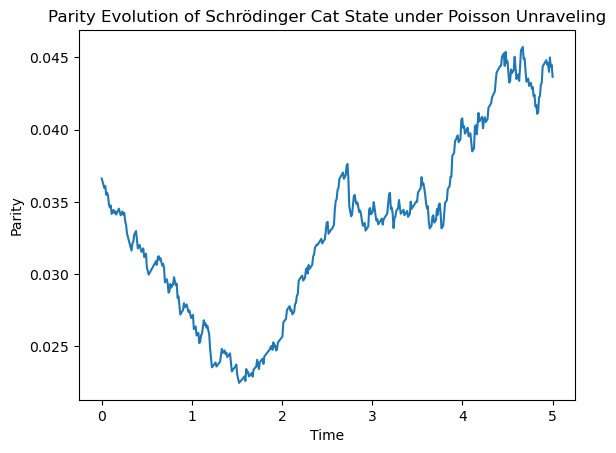

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import coherent, mcsolve, destroy, qeye, basis

# Parameters
alpha = 2.0         # Coherent state amplitude
kappa = 0.1         # Photon loss rate
t_max = 5.0         # Maximum simulation time
n_steps = 500       # Time steps
num_trajectories = 100  # Number of trajectories

# Define Hilbert space
dim = 20  # Dimension of the Hilbert space
a = destroy(dim)  # Annihilation operator

# Initial Schrödinger cat state (π-phase)
alpha_state = coherent(dim, alpha)
minus_alpha_state = coherent(dim, -alpha)
cat_state = (alpha_state + minus_alpha_state).unit()

# Collapse operators for photon loss
L1 = np.sqrt(kappa / 2) * (a + 1j * alpha)  # Detector D1
L2 = 1j * np.sqrt(kappa / 2) * (a - 1j * alpha)  # Detector D2
collapse_ops = [L1, L2]

# Time evolution
times = np.linspace(0, t_max, n_steps)

# Identity Hamiltonian (no dynamics)
H = qeye(dim) * 0  # Zero Hamiltonian

# Solve using Monte Carlo method
result = mcsolve(H, cat_state, times, c_ops=collapse_ops, ntraj=num_trajectories)

# Analyze final state from averaged density matrix
rho_avg = sum(state * state.dag() for state in result.states) / num_trajectories

# Function to compute parity
def parity(state):
    parity_op = sum([(-1)**n * basis(dim, n) * basis(dim, n).dag() for n in range(dim)])
    return np.real((state.dag() * parity_op * state).full().flatten()[0])

# Calculate parity over time for all trajectories
parity_values = [parity(state) for state in result.states]

# Plot results
plt.plot(times, parity_values)
plt.title("Parity Evolution of Schrödinger Cat State under Poisson Unraveling")
plt.xlabel("Time")
plt.ylabel("Parity")
plt.show()


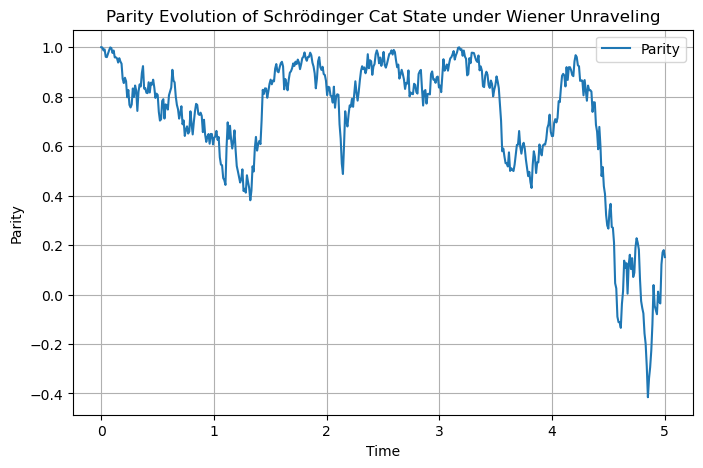

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import coherent, destroy, basis, qeye

# Parameters
alpha = 2.0          # Coherent state amplitude
kappa = 0.1          # Photon loss rate
t_max = 5.0          # Maximum simulation time
n_steps = 500        # Number of time steps
dim = 20             # Hilbert space dimension
dt = t_max / n_steps  # Time step size

# Operators
a = destroy(dim)  # Annihilation operator

# Initial cat state (π-phase Schrödinger cat state)
cat_state = (coherent(dim, alpha) + coherent(dim, -alpha)).unit()

# Lindblad operators
L1 = np.sqrt(kappa / 2) * (a + 1j * alpha)
L2 = 1j * np.sqrt(kappa / 2) * (a - 1j * alpha)

# Initialize state and time evolution
state = cat_state
states = [state]
times = np.linspace(0, t_max, n_steps)

# Stochastic simulation
np.random.seed(42)  # For reproducibility
for t in times[:-1]:
    # Calculate expectation values (directly as scalars)
    L1_exp = (state.dag() * L1 * state)  # Extract scalar
    L2_exp = (state.dag() * L2 * state)  # Extract scalar
    
    # Wiener increments
    dW1 = np.random.normal(0, np.sqrt(dt))
    dW2 = np.random.normal(0, np.sqrt(dt))
    
    # Deterministic evolution (effective Hamiltonian)
    H_eff = -1j * (L1.dag() * L1 + L2.dag() * L2) / 2
    deterministic = H_eff * state * dt
    
    # Stochastic evolution
    stochastic = (
        (L1 - L1_exp) * state * dW1 +
        (L2 - L2_exp) * state * dW2
    )
    
    # Update state
    state = state + deterministic + stochastic
    state = state.unit()  # Renormalize the state
    states.append(state)

# Analyze and visualize results
# Example: Parity evolution
def parity(state):
    parity_op = sum([(-1)**n * basis(dim, n) * basis(dim, n).dag() for n in range(dim)])
    return np.real((state.dag() * parity_op * state))

parities = [parity(s) for s in states]

# Plot parity over time
plt.figure(figsize=(8, 5))
plt.plot(times, parities, label="Parity")
plt.xlabel("Time")
plt.ylabel("Parity")
plt.title("Parity Evolution of Schrödinger Cat State under Wiener Unraveling")
plt.legend()
plt.grid()
plt.show()


10.0%. Run time:   3.15s. Est. time left: 00:00:00:28
20.0%. Run time:   5.14s. Est. time left: 00:00:00:20
30.0%. Run time:   7.00s. Est. time left: 00:00:00:16
40.0%. Run time:   8.46s. Est. time left: 00:00:00:12
50.0%. Run time:   9.89s. Est. time left: 00:00:00:09
60.0%. Run time:  11.55s. Est. time left: 00:00:00:07
70.0%. Run time:  13.48s. Est. time left: 00:00:00:05
80.0%. Run time:  15.02s. Est. time left: 00:00:00:03
90.0%. Run time:  16.71s. Est. time left: 00:00:00:01
100.0%. Run time:  18.20s. Est. time left: 00:00:00:00
Total run time:  18.38s


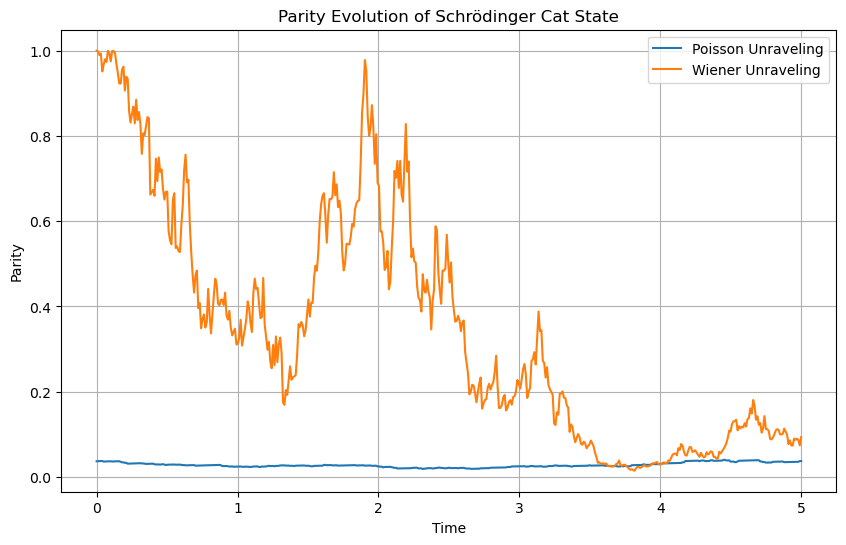

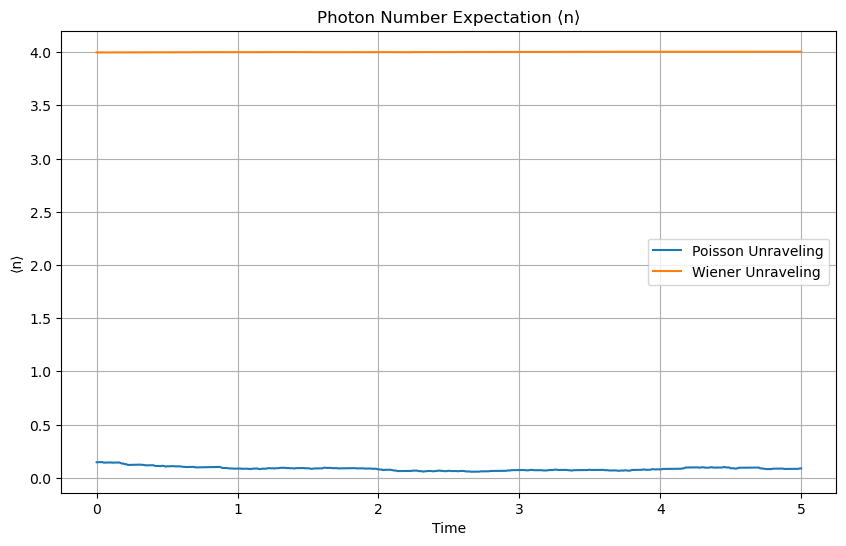

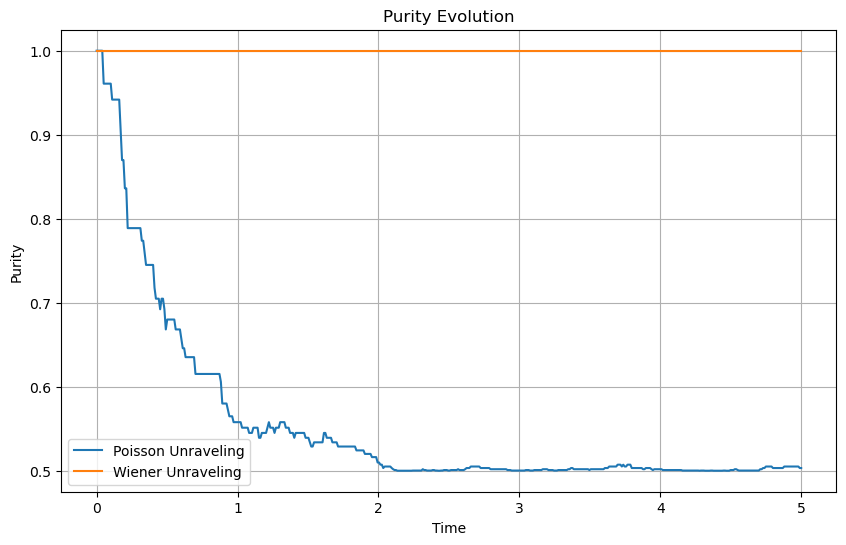

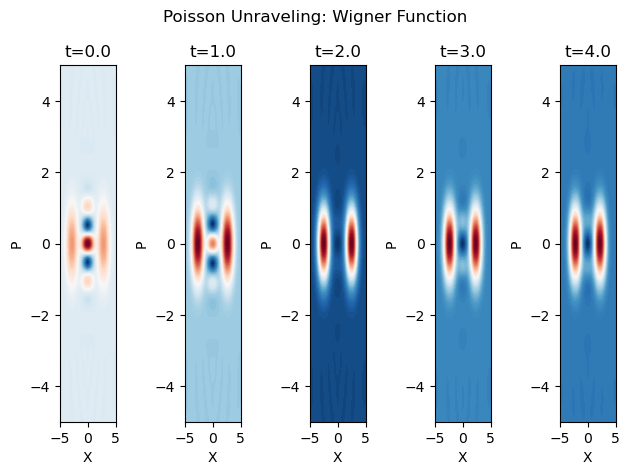

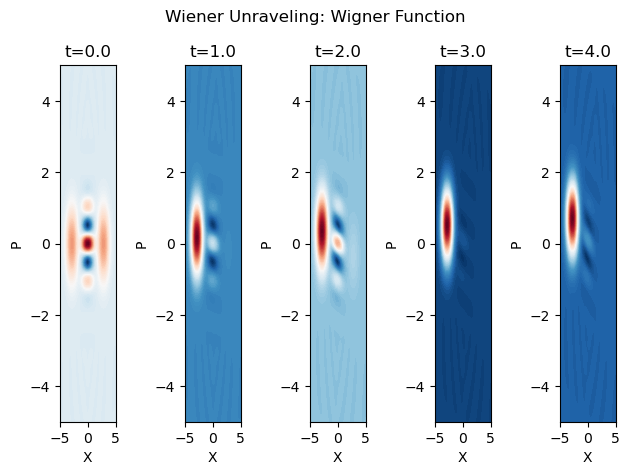

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import coherent, destroy, mcsolve, qeye, basis, fidelity, wigner

# Parameters
alpha = 2.0          # Coherent state amplitude
kappa = 0.1          # Photon loss rate
t_max = 5.0          # Maximum simulation time
n_steps = 500        # Number of time steps
dim = 20             # Hilbert space dimension
num_trajectories = 100  # Number of trajectories for Poisson unraveling
dt = t_max / n_steps  # Time step size

# Operators
a = destroy(dim)  # Annihilation operator

# Initial Schrödinger cat state (π-phase Schrödinger cat state)
cat_state = (coherent(dim, alpha) + coherent(dim, -alpha)).unit()

# # Lindblad operators for homodyne detection
# L1 = np.sqrt(kappa / 2) * (a + 1j * alpha)
# L2 = 1j * np.sqrt(kappa / 2) * (a - 1j * alpha)
# collapse_ops = [L1, L2]

L1 = np.sqrt(kappa) * a
L2 = qeye(dim) * 0
collapse_ops = [L1, L2]


# Time evolution
times = np.linspace(0, t_max, n_steps)

# Parity operator
parity_op = sum([(-1) ** n * basis(dim, n) * basis(dim, n).dag() for n in range(dim)])



# Helper functions
def parity(state):
    """Compute parity for Poisson unraveling."""
    return np.real((state.dag() * parity_op * state).full().flatten()[0])

def parity_wiener(state):
    """Compute parity for Wiener unraveling."""
    return np.real((state.dag() * parity_op * state))

def photon_number(state):
    """Compute photon number expectation ⟨n⟩ as a scalar float."""
    return np.real((state.dag() * a.dag() * a * state).full()[0, 0])

def photon_number_wiener(state):
    """Compute photon number expectation ⟨n⟩ for Wiener unraveling."""
    return np.real(state.dag() * a.dag() * a * state)  # Directly extract the scalar




# ------------------------------
# Poisson Unraveling (mcsolve)
# ------------------------------
poisson_result = mcsolve(qeye(dim) * 0, cat_state, times, c_ops=collapse_ops, ntraj=num_trajectories)
poisson_states = poisson_result.states
poisson_parity = [parity(state) for state in poisson_states]
poisson_photon_num = [photon_number(state) for state in poisson_states]
poisson_purity = [np.real((state * state.dag()).tr()) for state in poisson_states]


# ------------------------------
# Wiener Unraveling (SSE)
# ------------------------------
wiener_states = [cat_state]
wiener_parity = [parity_wiener(cat_state)]  # Include initial state parity
wiener_photon_num = [photon_number_wiener(cat_state)]  # Include initial state photon number
wiener_purity = [np.real((cat_state * cat_state.dag()).tr())]  # Include initial state purity

state = cat_state
np.random.seed(42)  # For reproducibility
for t in times[:-1]:
    # Expectation values for Wiener unraveling
    L1_exp = (state.dag() * L1 * state)
    L2_exp = (state.dag() * L2 * state)

    # Wiener increments
    dW1 = np.random.normal(0, np.sqrt(dt))
    dW2 = np.random.normal(0, np.sqrt(dt))

    # Deterministic and stochastic evolution
    H_eff = -1j * (L1.dag() * L1 + L2.dag() * L2) / 2
    deterministic = H_eff * state * dt
    stochastic = (L1 - L1_exp) * state * dW1 + (L2 - L2_exp) * state * dW2

    # Update state
    state = (state + deterministic + stochastic).unit()
    wiener_states.append(state)

    # Debugging observables
    wiener_parity.append(parity_wiener(state))
    wiener_photon_num.append(photon_number_wiener(state))
    wiener_purity.append(np.real((state * state.dag()).tr()))


# ------------------------------
# Plot Results
# ------------------------------

# Parity Evolution
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_parity, label="Poisson Unraveling")
plt.plot(times, wiener_parity, label="Wiener Unraveling")
plt.title("Parity Evolution of Schrödinger Cat State")
plt.xlabel("Time")
plt.ylabel("Parity")
plt.legend()
plt.grid()
plt.show()

# Photon Number Expectation
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_photon_num, label="Poisson Unraveling")
plt.plot(times, wiener_photon_num, label="Wiener Unraveling")
plt.title("Photon Number Expectation ⟨n⟩")
plt.xlabel("Time")
plt.ylabel("⟨n⟩")
plt.legend()
plt.grid()
plt.show()

# Purity Evolution
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_purity, label="Poisson Unraveling")
plt.plot(times, wiener_purity, label="Wiener Unraveling")
plt.title("Purity Evolution")
plt.xlabel("Time")
plt.ylabel("Purity")
plt.legend()
plt.grid()
plt.show()


# ------------------------------
# Wigner Function Snapshots
# ------------------------------
def plot_wigner(states, title):
    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    for i, state in enumerate(states):
        W = wigner(state, x, y)
        plt.subplot(1, len(states), i + 1)
        plt.contourf(X, Y, W, 100, cmap="RdBu_r")
        plt.title(f"t={times[int(n_steps / len(states) * i)]:.1f}")
        plt.xlabel("X")
        plt.ylabel("P")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Choose 5 evenly spaced snapshots
snapshot_indices = np.linspace(0, n_steps - 1, 5, dtype=int)
poisson_snapshots = [poisson_states[i] for i in snapshot_indices]
wiener_snapshots = [wiener_states[i] for i in snapshot_indices]

plot_wigner(poisson_snapshots, "Poisson Unraveling: Wigner Function")
plot_wigner(wiener_snapshots, "Wiener Unraveling: Wigner Function")


ValueError: setting an array element with a sequence.

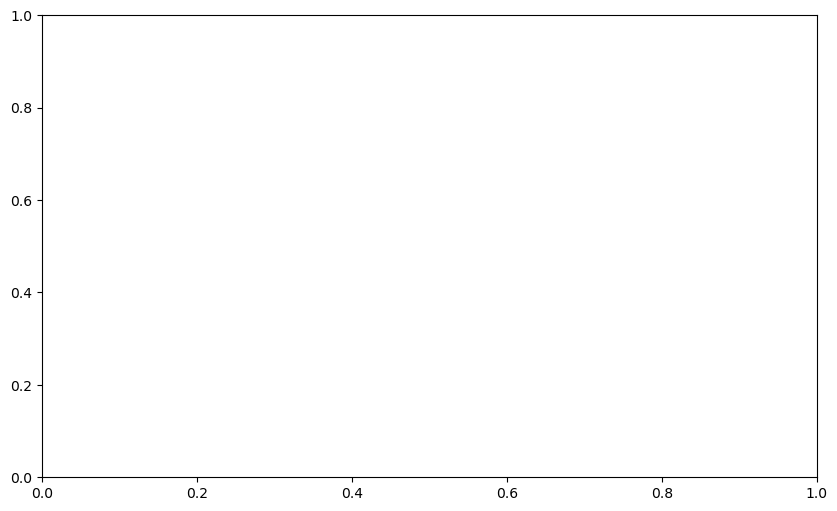

In [59]:
def photon_number(state):
    """Compute photon number expectation ⟨n⟩."""
    return np.real((state.dag() * a.dag() * a * state))

# Photon number operator
n_op = a.dag() * a

# Photon number expectation for Poisson unraveling
# poisson_photon_num = [np.real((state.dag() * n_op * state).full().flatten()[0]) for state in poisson_states]
poisson_photon_num = [photon_number(state) for state in poisson_states]

# Photon number expectation for Wiener unraveling
wiener_photon_num = [np.real((state.dag() * n_op * state)) for state in wiener_states]

# Plot photon number expectation
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_photon_num, label="Poisson Unraveling")
plt.plot(times, wiener_photon_num, label="Wiener Unraveling")
plt.title("Photon Number Expectation ⟨n⟩")
plt.xlabel("Time")
plt.ylabel("⟨n⟩")
plt.legend()
plt.grid()
plt.show()


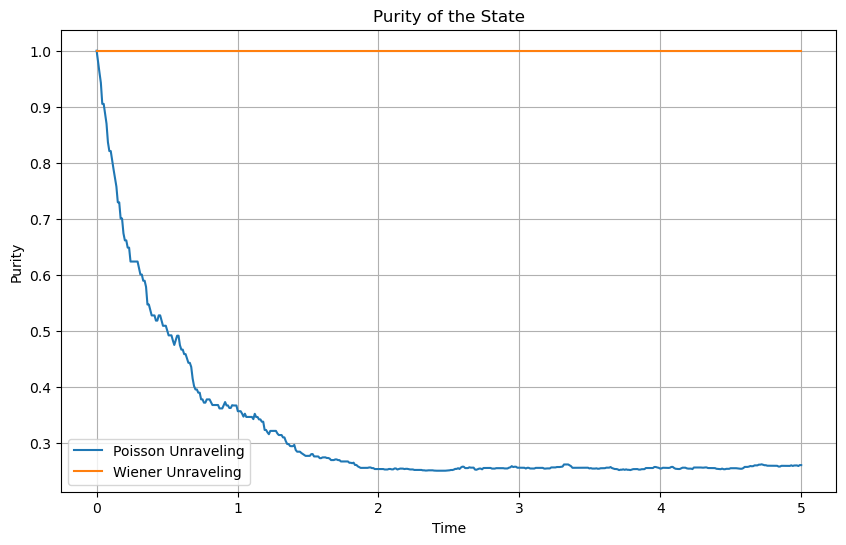

In [52]:
# Purity calculation for Poisson unraveling
poisson_purity = [np.real((state * state.dag()).tr() ** 2) for state in poisson_states]

# Purity calculation for Wiener unraveling
wiener_purity = [np.real((state * state.dag()).tr() ** 2) for state in wiener_states]

# Plot purity
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_purity, label="Poisson Unraveling")
plt.plot(times, wiener_purity, label="Wiener Unraveling")
plt.title("Purity of the State")
plt.xlabel("Time")
plt.ylabel("Purity")
plt.legend()
plt.grid()
plt.show()


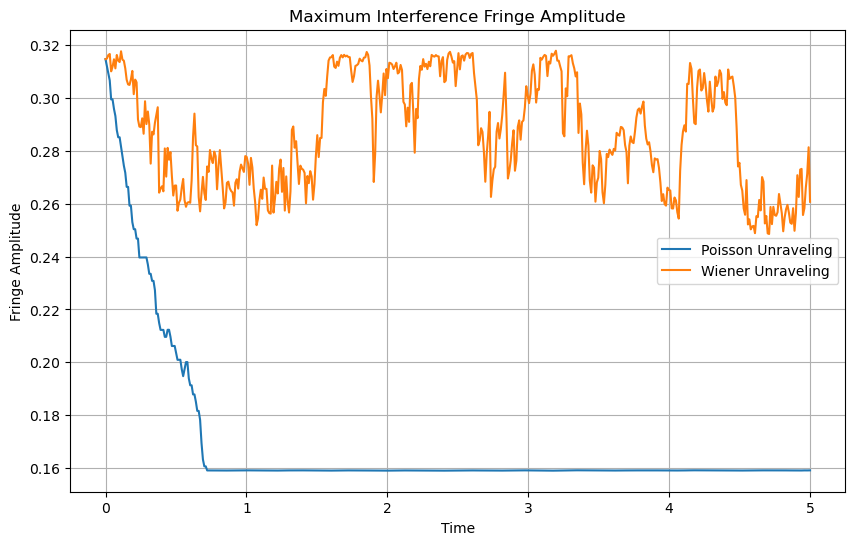

In [53]:
# Function to calculate maximum interference fringe amplitude
def max_wigner_fringe(state):
    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    W = wigner(state, x, y)
    return np.max(np.abs(W))

# Calculate fringe amplitude over time
poisson_fringe_amplitude = [max_wigner_fringe(state) for state in poisson_states]
wiener_fringe_amplitude = [max_wigner_fringe(state) for state in wiener_states]

# Plot fringe amplitude
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_fringe_amplitude, label="Poisson Unraveling")
plt.plot(times, wiener_fringe_amplitude, label="Wiener Unraveling")
plt.title("Maximum Interference Fringe Amplitude")
plt.xlabel("Time")
plt.ylabel("Fringe Amplitude")
plt.legend()
plt.grid()
plt.show()


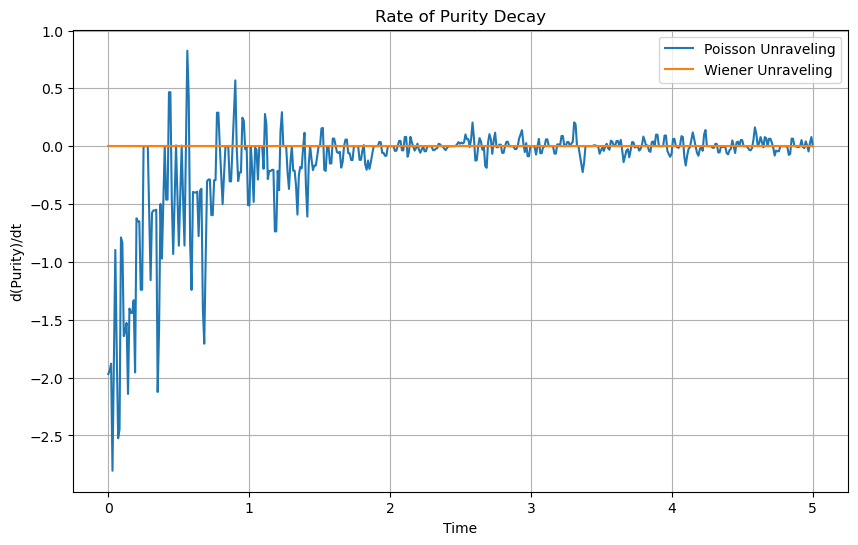

In [54]:
# Calculate purity decay rate
poisson_purity_decay_rate = np.gradient(poisson_purity, dt)
wiener_purity_decay_rate = np.gradient(wiener_purity, dt)

# Plot purity decay rate
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_purity_decay_rate, label="Poisson Unraveling")
plt.plot(times, wiener_purity_decay_rate, label="Wiener Unraveling")
plt.title("Rate of Purity Decay")
plt.xlabel("Time")
plt.ylabel("d(Purity)/dt")
plt.legend()
plt.grid()
plt.show()


10.0%. Run time:   1.53s. Est. time left: 00:00:00:13
20.0%. Run time:   3.22s. Est. time left: 00:00:00:12
30.0%. Run time:   4.83s. Est. time left: 00:00:00:11
40.0%. Run time:   6.69s. Est. time left: 00:00:00:10
50.0%. Run time:   8.81s. Est. time left: 00:00:00:08
60.0%. Run time:  10.09s. Est. time left: 00:00:00:06
70.0%. Run time:  11.50s. Est. time left: 00:00:00:04
80.0%. Run time:  12.75s. Est. time left: 00:00:00:03
90.0%. Run time:  14.41s. Est. time left: 00:00:00:01
100.0%. Run time:  16.08s. Est. time left: 00:00:00:00
Total run time:  16.24s


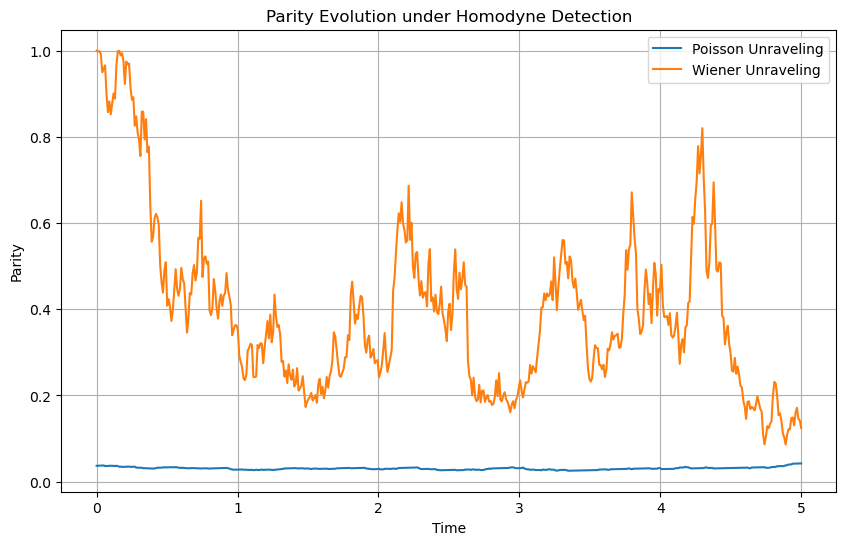

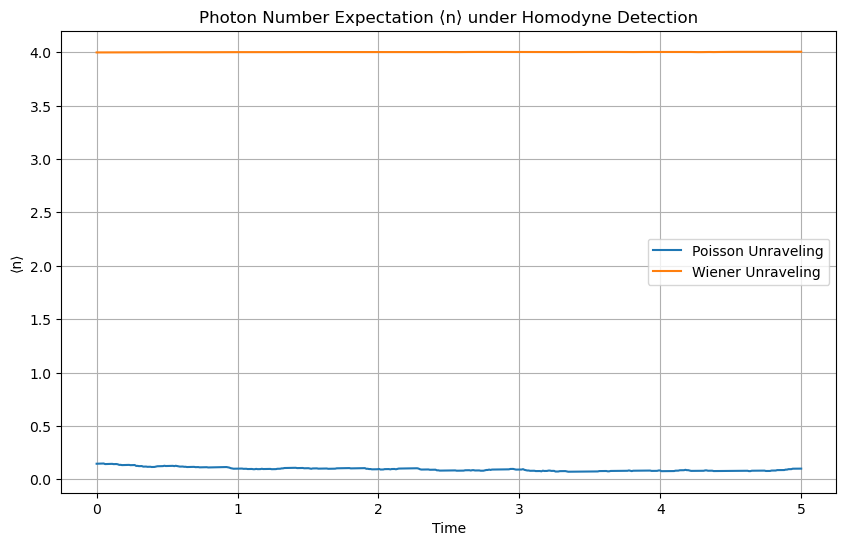

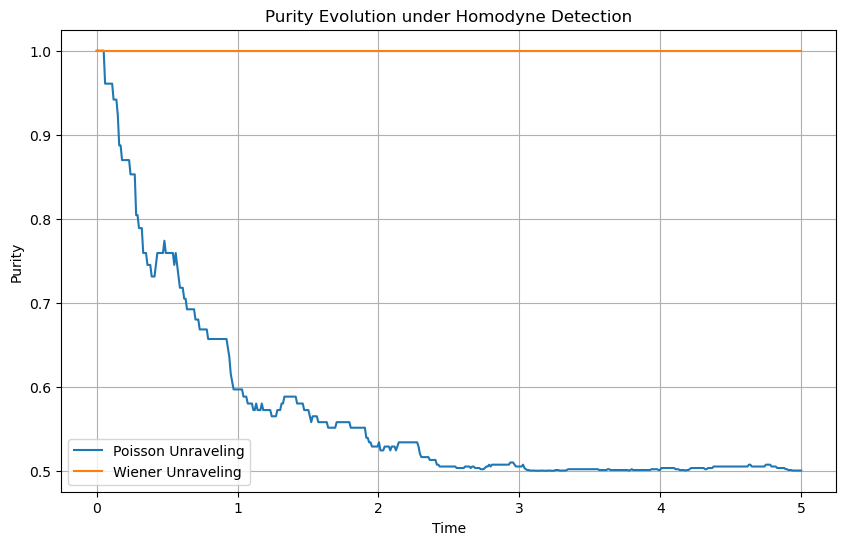

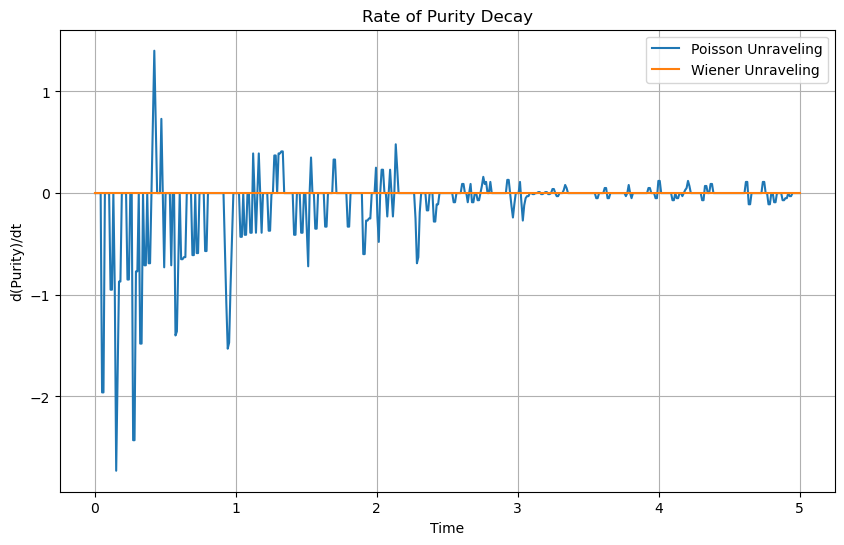

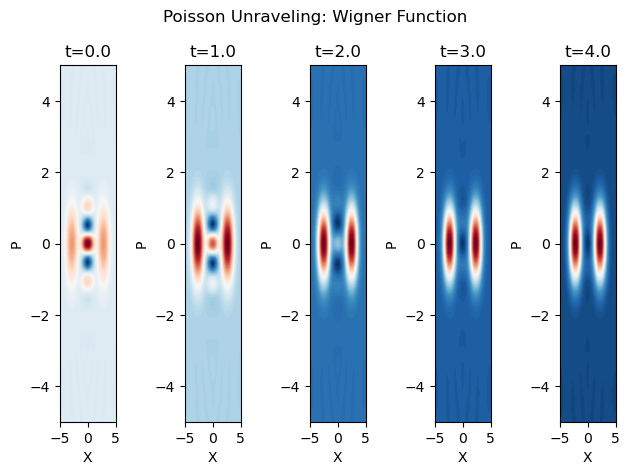

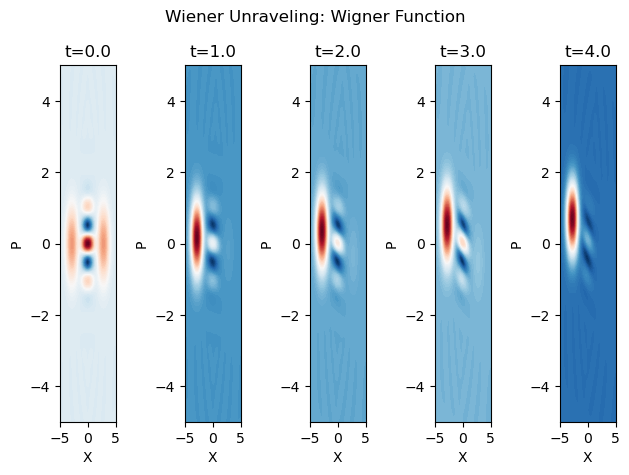

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import coherent, destroy, mcsolve, qeye, basis, wigner

# Parameters
alpha = 2.0          # Coherent state amplitude
kappa = 0.1          # Photon loss rate
t_max = 5.0          # Maximum simulation time
n_steps = 500        # Number of time steps
dim = 20             # Hilbert space dimension
num_trajectories = 100  # Number of trajectories for Poisson unraveling
dt = t_max / n_steps  # Time step size

# Operators
a = destroy(dim)  # Annihilation operator

# Initial Schrödinger cat state
cat_state = (coherent(dim, alpha) + coherent(dim, -alpha)).unit()

# Lindblad operator for homodyne detection
L = np.sqrt(kappa) * a
collapse_ops = [L]

# Time evolution
times = np.linspace(0, t_max, n_steps)

# Parity operator
parity_op = sum([(-1) ** n * basis(dim, n) * basis(dim, n).dag() for n in range(dim)])

# Helper functions
def parity(state):
    """Compute parity."""
    return np.real((state.dag() * parity_op * state).full()[0, 0])

def parity_wiener(state):
    """Compute parity for Wiener unraveling."""
    return np.real((state.dag() * parity_op * state))

def photon_number(state):
    """Compute photon number expectation ⟨n⟩."""
    return np.real((state.dag() * a.dag() * a * state).full()[0, 0])

def photon_number_wiener(state):
    """Compute photon number expectation ⟨n⟩ for Wiener unraveling."""
    return np.real(state.dag() * a.dag() * a * state)  # Directly extract the scalar

def purity(state):
    """Compute purity of the state."""
    return np.real((state * state.dag()).tr())

# # Helper functions
# def parity(state):
#     """Compute parity for Poisson unraveling."""
#     return np.real((state.dag() * parity_op * state).full().flatten()[0])

# def parity_wiener(state):
#     """Compute parity for Wiener unraveling."""
#     return np.real((state.dag() * parity_op * state))

# def photon_number(state):
#     """Compute photon number expectation ⟨n⟩ as a scalar float."""
#     return np.real((state.dag() * a.dag() * a * state).full()[0, 0])

# def photon_number_wiener(state):
#     """Compute photon number expectation ⟨n⟩ for Wiener unraveling."""
#     return np.real(state.dag() * a.dag() * a * state)  # Directly extract the scalar

# ------------------------------
# Poisson Unraveling (mcsolve)
# ------------------------------
poisson_result = mcsolve(qeye(dim) * 0, cat_state, times, c_ops=collapse_ops, ntraj=num_trajectories)
poisson_states = poisson_result.states
poisson_parity = [parity(state) for state in poisson_states]
poisson_photon_num = [photon_number(state) for state in poisson_states]
poisson_purity = [purity(state) for state in poisson_states]
poisson_purity_decay_rate = np.gradient(poisson_purity, dt)

# ------------------------------
# Wiener Unraveling (SSE)
# ------------------------------
wiener_states = [cat_state]
state = cat_state
np.random.seed(42)  # For reproducibility
for t in times[:-1]:
    # Expectation values
    L_exp = (state.dag() * L * state)
    dW = np.random.normal(0, np.sqrt(dt))  # Wiener increment
    H_eff = -1j * (L.dag() * L) / 2
    deterministic = H_eff * state * dt
    stochastic = (L - L_exp) * state * dW
    state = (state + deterministic + stochastic).unit()
    wiener_states.append(state)

wiener_parity = [parity_wiener(state) for state in wiener_states]
wiener_photon_num = [photon_number_wiener(state) for state in wiener_states]
wiener_purity = [purity(state) for state in wiener_states]
wiener_purity_decay_rate = np.gradient(wiener_purity, dt)

# ------------------------------
# Plot Results
# ------------------------------
# Parity Evolution
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_parity, label="Poisson Unraveling")
plt.plot(times, wiener_parity, label="Wiener Unraveling")
plt.title("Parity Evolution under Homodyne Detection")
plt.xlabel("Time")
plt.ylabel("Parity")
plt.legend()
plt.grid()
plt.show()

# Photon Number Expectation
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_photon_num, label="Poisson Unraveling")
plt.plot(times, wiener_photon_num, label="Wiener Unraveling")
plt.title("Photon Number Expectation ⟨n⟩ under Homodyne Detection")
plt.xlabel("Time")
plt.ylabel("⟨n⟩")
plt.legend()
plt.grid()
plt.show()

# Purity Evolution
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_purity, label="Poisson Unraveling")
plt.plot(times, wiener_purity, label="Wiener Unraveling")
plt.title("Purity Evolution under Homodyne Detection")
plt.xlabel("Time")
plt.ylabel("Purity")
plt.legend()
plt.grid()
plt.show()


# Plot Rate of Purity Decay
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_purity_decay_rate, label="Poisson Unraveling")
plt.plot(times, wiener_purity_decay_rate, label="Wiener Unraveling")
plt.title("Rate of Purity Decay")
plt.xlabel("Time")
plt.ylabel("d(Purity)/dt")
plt.legend()
plt.grid()
plt.show()


# Wigner Function Snapshots
def plot_wigner(states, title):
    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    for i, state in enumerate(states):
        W = wigner(state, x, y)
        plt.subplot(1, len(states), i + 1)
        plt.contourf(X, Y, W, 100, cmap="RdBu_r")
        plt.title(f"t={times[int(n_steps / len(states) * i)]:.1f}")
        plt.xlabel("X")
        plt.ylabel("P")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

snapshot_indices = np.linspace(0, n_steps - 1, 5, dtype=int)
plot_wigner([poisson_states[i] for i in snapshot_indices], "Poisson Unraveling: Wigner Function")
plot_wigner([wiener_states[i] for i in snapshot_indices], "Wiener Unraveling: Wigner Function")


<>:78: SyntaxWarning: invalid escape sequence '\s'
<>:78: SyntaxWarning: invalid escape sequence '\s'
/var/folders/z9/4q0cctmj41d0drmc3j9l61y00000gn/T/ipykernel_61868/3483433656.py:78: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("Expectation value of $\sigma_z$")


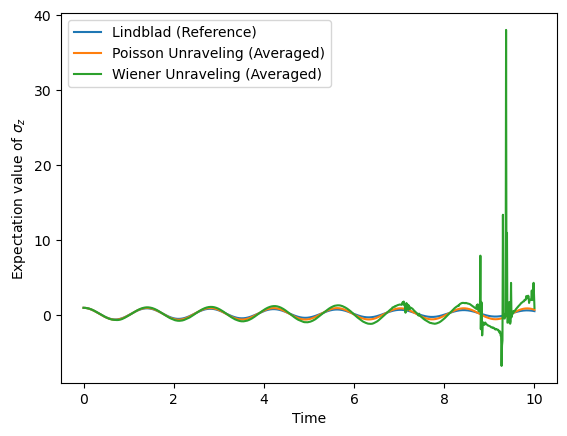

In [108]:
import numpy as np
from qutip import *

# Define parameters
gamma = 0.1  # Dissipation rate
delta = 1.0  # Hamiltonian detuning
omega = 2.0  # Rabi frequency
N = 2        # Number of levels (qubit system)
dt = 0.01    # Time step
T = 10.0     # Total simulation time
steps = int(T / dt)
num_trajectories = 100  # Number of trajectories for averaging

# Define system operators
H = delta * sigmaz() + omega * sigmax()  # Hamiltonian
L = np.sqrt(gamma) * destroy(N)          # Collapse operator

# Lindblad master equation (reference solution)
rho0 = basis(2, 0) * basis(2, 0).dag()  # Initial state
rho_lindblad = mesolve(H, rho0, np.linspace(0, T, steps + 1), [L])

# Initialize arrays to store ensemble averages
avg_poisson = np.zeros(steps + 1)
avg_wiener = np.zeros(steps + 1)

# Time array includes initial time
times = np.linspace(0, T, steps + 1)

# Poisson unraveling (ensemble averaging)
for _ in range(num_trajectories):
    rho_poisson = rho0
    states_poisson = [rho_poisson]
    for _ in range(steps):
        # Evolution under Hamiltonian
        U = (-1j * H * dt).expm()
        rho_poisson = U * rho_poisson * U.dag()

        # Apply jumps
        p_jump = gamma * np.real(expect(L.dag() * L, rho_poisson)) * dt
        if np.random.rand() < p_jump:
            rho_poisson = L * rho_poisson * L.dag()
            rho_poisson = rho_poisson / rho_poisson.tr()  # Normalize

        states_poisson.append(rho_poisson)

    # Add expectation values of sigma_z to average
    avg_poisson += np.array([expect(sigmaz(), state) for state in states_poisson])

# Normalize Poisson average
avg_poisson /= num_trajectories

# Wiener unraveling (ensemble averaging)
for _ in range(num_trajectories):
    rho_wiener = rho0
    states_wiener = [rho_wiener]
    for _ in range(steps):
        dW = np.sqrt(dt) * np.random.randn()  # Wiener increment
        dL = -1j * (H * rho_wiener - rho_wiener * H) * dt
        dL += (L * rho_wiener * L.dag() - 0.5 * (L.dag() * L * rho_wiener + rho_wiener * L.dag() * L)) * dt
        rho_wiener += dL + (L * rho_wiener + rho_wiener * L.dag()) * dW
        rho_wiener = rho_wiener / rho_wiener.tr()  # Normalize

        states_wiener.append(rho_wiener)

    # Add expectation values of sigma_z to average
    avg_wiener += np.array([expect(sigmaz(), state) for state in states_wiener])

# Normalize Wiener average
avg_wiener /= num_trajectories

# Plot results
import matplotlib.pyplot as plt

plt.plot(times, expect(sigmaz(), rho_lindblad.states), label="Lindblad (Reference)")
plt.plot(times, avg_poisson, label="Poisson Unraveling (Averaged)")
plt.plot(times, avg_wiener, label="Wiener Unraveling (Averaged)")
plt.xlabel("Time")
plt.ylabel("Expectation value of $\sigma_z$")
plt.legend()
plt.show()


10.0%. Run time:  20.18s. Est. time left: 00:00:03:01
20.0%. Run time:  36.24s. Est. time left: 00:00:02:24
30.0%. Run time:  56.35s. Est. time left: 00:00:02:11
40.0%. Run time:  72.83s. Est. time left: 00:00:01:49
50.0%. Run time:  91.04s. Est. time left: 00:00:01:31
60.0%. Run time: 110.68s. Est. time left: 00:00:01:13
70.0%. Run time: 128.53s. Est. time left: 00:00:00:55
80.0%. Run time: 145.02s. Est. time left: 00:00:00:36
90.0%. Run time: 161.30s. Est. time left: 00:00:00:17
100.0%. Run time: 178.92s. Est. time left: 00:00:00:00
Total run time: 179.33s


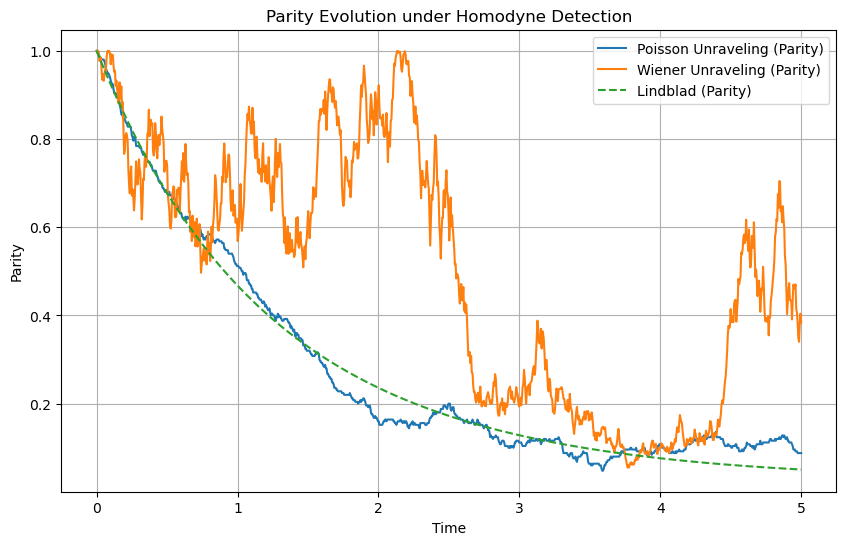

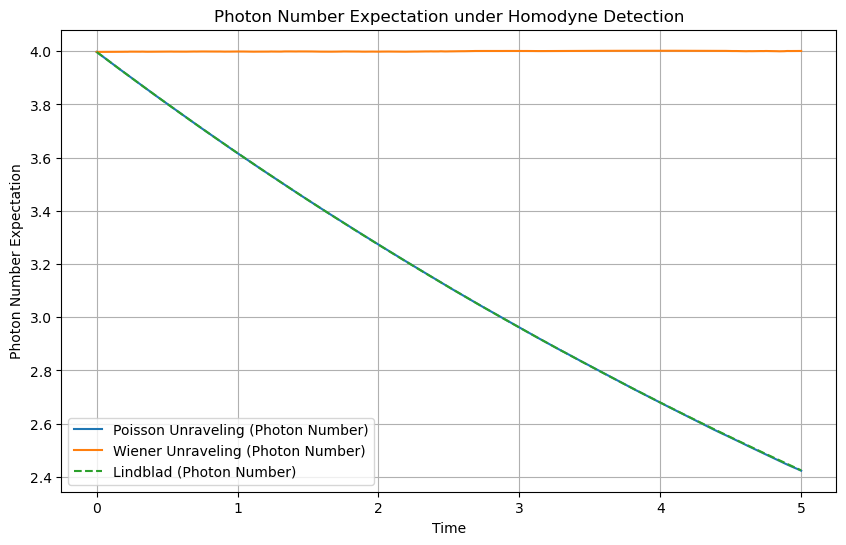

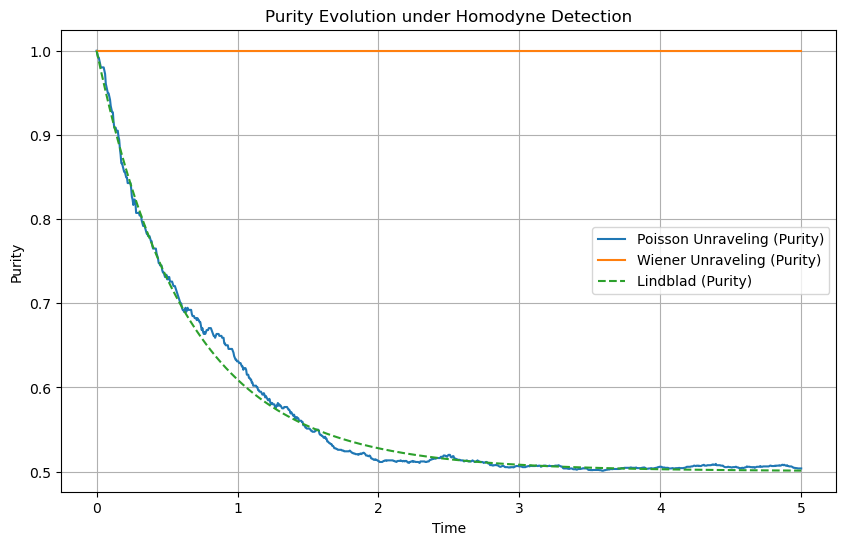

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import (
    coherent,
    destroy,
    mcsolve,
    mesolve,
    expect,
    qeye,
    basis,
    Qobj,
)

# Parameters
alpha = 2.0             # Coherent state amplitude
kappa = 0.1             # Photon loss rate
t_max = 5.0             # Maximum simulation time
n_steps = 1000          # Number of time steps
dim = 20                # Hilbert space dimension
num_trajectories = 500  # Number of trajectories for Poisson unraveling
dt = t_max / n_steps    # Time step size

# Operators
a = destroy(dim)  # Annihilation operator

# Initial Schrödinger cat state (π-phase Schrödinger cat state)
cat_state = (coherent(dim, alpha) + coherent(dim, -alpha)).unit()

# Lindblad operators
L1 = np.sqrt(kappa) * a
collapse_ops = [L1]

# Time evolution
times = np.linspace(0, t_max, n_steps)

# Parity operator
parity_op = sum(
    [(-1) ** n * basis(dim, n) * basis(dim, n).dag() for n in range(dim)]
)

# Zero Hamiltonian
H_zero = Qobj(np.zeros((dim, dim)))

# ------------------------------
# Poisson Unraveling (mcsolve)
# ------------------------------

# Run Monte Carlo simulation
poisson_result = mcsolve(
    H_zero,
    cat_state,
    times,
    c_ops=collapse_ops,
    ntraj=num_trajectories,
)

# Compute observables
poisson_parity = expect(parity_op, poisson_result.states)
poisson_photon_number = expect(a.dag() * a, poisson_result.states)

# Compute purity for Poisson unraveling
poisson_purity = [
    np.real((state * state.dag()).tr()) for state in poisson_result.states
]

# ------------------------------
# Wiener Unraveling (SSE)
# ------------------------------

wiener_states = [cat_state]
state = cat_state

np.random.seed(42)  # For reproducibility
for t in times[:-1]:
    # Expectation value of L1
    L1_exp = expect(L1, state)

    # Clipped Wiener increment
    dW1 = np.clip(np.sqrt(dt) * np.random.randn(), -0.1, 0.1)

    # Effective Hamiltonian (including deterministic evolution)
    H_eff = -1j * (L1.dag() * L1) / 2
    deterministic = H_eff * state * dt

    # Stochastic term
    stochastic = (L1 - L1_exp) * state * dW1

    # Update state
    state = (state + deterministic + stochastic).unit()
    wiener_states.append(state)

# Compute observables for Wiener unraveling
wiener_parity = [expect(parity_op, state) for state in wiener_states]
wiener_photon_number = [expect(a.dag() * a, state) for state in wiener_states]
wiener_purity = [np.real((state * state.dag()).tr()) for state in wiener_states]

# ------------------------------
# Lindblad Master Equation (mesolve)
# ------------------------------

# Solve the master equation
lindblad_result = mesolve(
    H_zero, cat_state, times, c_ops=collapse_ops
)

# Extract observables for Lindblad master equation
lindblad_parity = [expect(parity_op, rho) for rho in lindblad_result.states]
lindblad_photon_number = [
    expect(a.dag() * a, rho) for rho in lindblad_result.states
]
lindblad_purity = [np.real((rho * rho).tr()) for rho in lindblad_result.states]

# ------------------------------
# Plot Results
# ------------------------------

# Parity Comparison
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_parity, label="Poisson Unraveling (Parity)")
plt.plot(times, wiener_parity, label="Wiener Unraveling (Parity)")
plt.plot(
    times, lindblad_parity, label="Lindblad (Parity)", linestyle="--"
)
plt.title("Parity Evolution under Homodyne Detection")
plt.xlabel("Time")
plt.ylabel("Parity")
plt.legend()
plt.grid()
plt.show()

# Photon Number Expectation Comparison
plt.figure(figsize=(10, 6))
plt.plot(
    times, poisson_photon_number,
    label="Poisson Unraveling (Photon Number)"
)
plt.plot(
    times, wiener_photon_number,
    label="Wiener Unraveling (Photon Number)"
)
plt.plot(
    times, lindblad_photon_number,
    label="Lindblad (Photon Number)", linestyle="--"
)
plt.title("Photon Number Expectation under Homodyne Detection")
plt.xlabel("Time")
plt.ylabel("Photon Number Expectation")
plt.legend()
plt.grid()
plt.show()

# Purity Comparison
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_purity, label="Poisson Unraveling (Purity)")
plt.plot(times, wiener_purity, label="Wiener Unraveling (Purity)")
plt.plot(times, lindblad_purity, label="Lindblad (Purity)", linestyle="--")
plt.title("Purity Evolution under Homodyne Detection")
plt.xlabel("Time")
plt.ylabel("Purity")
plt.legend()
plt.grid()
plt.show()



# Actual Unraveling Codes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import (
    coherent,
    destroy,
    mcsolve,
    mesolve,
    expect,
    basis,
    Qobj,
)

# Parameters
alpha = 2.0             # Coherent state amplitude
kappa = 0.1             # Photon loss rate
t_max = 5.0             # Maximum simulation time
n_steps = 1000          # Number of time steps
dim = 20                # Hilbert space dimension
num_trajectories_poisson = 500  # Number of trajectories for Poisson unraveling
num_trajectories_qsd = 100  # Number of trajectories for QSD
dt = t_max / n_steps    # Time step size

# Operators
a = destroy(dim)  # Annihilation operator

# System Hamiltonian (e.g., cavity field energy with detuning)
Delta = 0.05  # Detuning (set to zero if not applicable)
H = Delta * a.dag() * a  # Example Hamiltonian

# Initial Schrödinger cat state
cat_state = (coherent(dim, alpha) + coherent(dim, -alpha)).unit()

# Lindblad operators from the thought experiment
L1 = np.sqrt(kappa / 2) * (a + 1j * alpha)
L2 = 1j * np.sqrt(kappa / 2) * (a - 1j * alpha)
collapse_ops = [L1, L2]

# Time evolution
times = np.linspace(0, t_max, n_steps)

# Parity operator
parity_op = sum(
    [(-1) ** n * basis(dim, n) * basis(dim, n).dag() for n in range(dim)]
)

# ------------------------------
# Poisson Unraveling (mcsolve)
# ------------------------------
poisson_result = mcsolve(
    H,  # Corrected Hamiltonian
    cat_state,
    times,
    c_ops=collapse_ops,
    ntraj=num_trajectories_poisson,
)

poisson_parity = expect(parity_op, poisson_result.states)

# ------------------------------
# Quantum State Diffusion (QSD)
# ------------------------------
qsd_trajectory_parity = np.zeros((num_trajectories_qsd, len(times)))

np.random.seed(42)  # For reproducibility
for traj in range(num_trajectories_qsd):
    state = cat_state  # Reset state for each trajectory
    trajectory_states = [state]  # Include the initial state

    for t in times[:-1]:  # Iterate over all but the last time step
        # Expectation values for the collapse operators
        L1_exp = expect(L1, state)
        L2_exp = expect(L2, state)

        # Wiener increments
        dW1 = np.sqrt(dt) * np.random.randn()
        dW2 = np.sqrt(dt) * np.random.randn()

        # Deterministic evolution term
        deterministic = (
            -1j * H * state * dt
            + (L1_exp.conjugate() * L1 - 0.5 * (L1.dag() * L1 + np.abs(L1_exp)**2)) * state * dt
            + (L2_exp.conjugate() * L2 - 0.5 * (L2.dag() * L2 + np.abs(L2_exp)**2)) * state * dt
        )

        # Stochastic evolution term
        stochastic = (
            (L1 - L1_exp) * state * dW1
            + (L2 - L2_exp) * state * dW2
        )

        # Update state and normalize
        state = (state + deterministic + stochastic).unit()
        trajectory_states.append(state)  # Append the new state

    # Compute parity for this trajectory
    qsd_trajectory_parity[traj] = [
        expect(parity_op, state) for state in trajectory_states
    ]

# Average over all QSD trajectories
qsd_parity = np.mean(qsd_trajectory_parity, axis=0)

# ------------------------------
# Lindblad Master Equation (mesolve)
# ------------------------------
lindblad_result = mesolve(
    H,  # Corrected Hamiltonian
    cat_state,
    times,
    c_ops=collapse_ops,
)

lindblad_parity = [expect(parity_op, rho) for rho in lindblad_result.states]


10.0%. Run time:   9.88s. Est. time left: 00:00:01:28
20.0%. Run time:  18.77s. Est. time left: 00:00:01:15
30.0%. Run time:  26.77s. Est. time left: 00:00:01:02
40.0%. Run time:  34.99s. Est. time left: 00:00:00:52
50.0%. Run time:  50.09s. Est. time left: 00:00:00:50
60.0%. Run time:  58.98s. Est. time left: 00:00:00:39
70.0%. Run time:  67.21s. Est. time left: 00:00:00:28
80.0%. Run time:  75.88s. Est. time left: 00:00:00:18
90.0%. Run time:  83.37s. Est. time left: 00:00:00:09
100.0%. Run time:  91.34s. Est. time left: 00:00:00:00
Total run time:  91.50s


In [8]:
qsd_parity

array([1.        , 0.99547308, 0.99063534, 0.98594265, 0.97935187,
       0.97458404, 0.96888515, 0.96474712, 0.96068187, 0.95844217,
       0.95274009, 0.94994514, 0.94816079, 0.94901862, 0.94442684,
       0.94063371, 0.93541262, 0.93049266, 0.92444408, 0.92168691,
       0.91630006, 0.90875361, 0.90212123, 0.8996494 , 0.89482038,
       0.88740099, 0.88639607, 0.88030887, 0.8777568 , 0.87332873,
       0.87224066, 0.86850264, 0.86344043, 0.85900089, 0.85821934,
       0.8509241 , 0.84906548, 0.84808952, 0.84459428, 0.83955181,
       0.84098276, 0.83429366, 0.8288455 , 0.82625765, 0.82688415,
       0.82585538, 0.81702002, 0.81426964, 0.8151343 , 0.81423449,
       0.80919343, 0.80419484, 0.79620543, 0.79068338, 0.78706783,
       0.78212294, 0.77845265, 0.78013579, 0.78095887, 0.77877671,
       0.77842884, 0.76935399, 0.76784805, 0.7647366 , 0.76578283,
       0.76037459, 0.75900844, 0.75918283, 0.75360909, 0.75193389,
       0.75191064, 0.7467494 , 0.74454936, 0.73806339, 0.72739

In [24]:
# Photon number operator
photon_number_op = a.dag() * a

# Coherence operator (off-diagonal element between |alpha> and |-alpha>)
coherence_op = coherent(dim, alpha) * coherent(dim, -alpha).dag()

# Fidelity reference state (initial Schrödinger cat state)
reference_state = cat_state

# ------------------------------
# Poisson Unraveling: Additional Observables
# ------------------------------
poisson_photon_number = expect(photon_number_op, poisson_result.states)
poisson_coherence = [
    np.real(state.overlap(coherence_op)) for state in poisson_result.states
]
poisson_purity = [
    np.real((state * state.dag()).tr()) for state in poisson_result.states
]
poisson_fidelity = [
    np.abs((reference_state.dag() * state).full()[0, 0]) ** 2 for state in poisson_result.states
]

# ------------------------------
# Quantum State Diffusion (QSD): Additional Observables
# ------------------------------
qsd_trajectory_photon_number = np.zeros((num_trajectories_qsd, len(times)))
qsd_trajectory_coherence = np.zeros((num_trajectories_qsd, len(times)))
qsd_trajectory_purity = np.zeros((num_trajectories_qsd, len(times)))
qsd_trajectory_fidelity = np.zeros((num_trajectories_qsd, len(times)))

for traj in range(num_trajectories_qsd):
    state = cat_state  # Reset state for each trajectory
    trajectory_states = [state]  # Include the initial state

    for t in times[:-1]:  # Iterate over all but the last time step
        # Expectation values for the collapse operators
        L1_exp = expect(L1, state)
        L2_exp = expect(L2, state)

        # Wiener increments
        dW1 = np.sqrt(dt) * np.random.randn()
        dW2 = np.sqrt(dt) * np.random.randn()

        # Deterministic evolution term
        deterministic = (
            -1j * H * state * dt
            + (L1_exp.conjugate() * L1 - 0.5 * (L1.dag() * L1 + np.abs(L1_exp)**2)) * state * dt
            + (L2_exp.conjugate() * L2 - 0.5 * (L2.dag() * L2 + np.abs(L2_exp)**2)) * state * dt
        )

        # Stochastic evolution term
        stochastic = (
            1 / np.sqrt(2) * ((L1 - L1_exp) * state * dW1
            + (L2 - L2_exp) * state * dW2)
        )

        # Update state and normalize
        state = (state + deterministic + stochastic).unit()
        trajectory_states.append(state)  # Append the new state

    # Compute observables for this trajectory
    qsd_trajectory_photon_number[traj, :] = [
        expect(photon_number_op, state) for state in trajectory_states
    ]
    qsd_trajectory_coherence[traj, :] = [
        np.real(state.overlap(coherence_op)) for state in trajectory_states
    ]
    qsd_trajectory_purity[traj, :] = [
        np.real((state * state.dag()).tr()) for state in trajectory_states
    ]
    qsd_trajectory_fidelity[traj, :] = [
        np.abs((reference_state.dag() * state)) ** 2 for state in trajectory_states
    ]


# Average over all QSD trajectories
qsd_photon_number = np.mean(qsd_trajectory_photon_number, axis=0)
qsd_coherence = np.mean(qsd_trajectory_coherence, axis=0)
qsd_purity = np.mean(qsd_trajectory_purity, axis=0)
qsd_fidelity = np.mean(qsd_trajectory_fidelity, axis=0)

# ------------------------------
# Lindblad Master Equation: Additional Observables
# ------------------------------
lindblad_photon_number = [
    expect(photon_number_op, rho) for rho in lindblad_result.states
]
lindblad_coherence = [
    np.real(rho.overlap(coherence_op)) for rho in lindblad_result.states
]
lindblad_purity = [
    np.real((rho * rho).tr()) for rho in lindblad_result.states
]
lindblad_fidelity = [
    np.abs((reference_state.dag() * rho * reference_state))
    for rho in lindblad_result.states
]



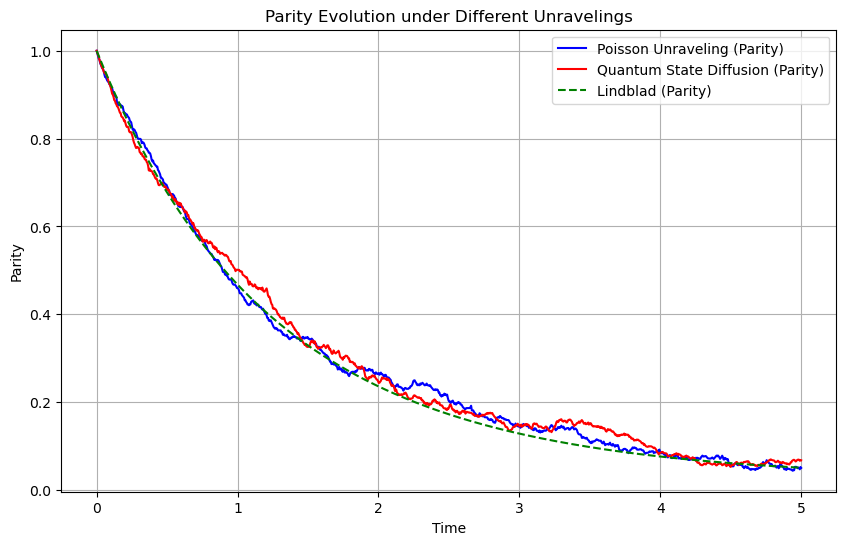

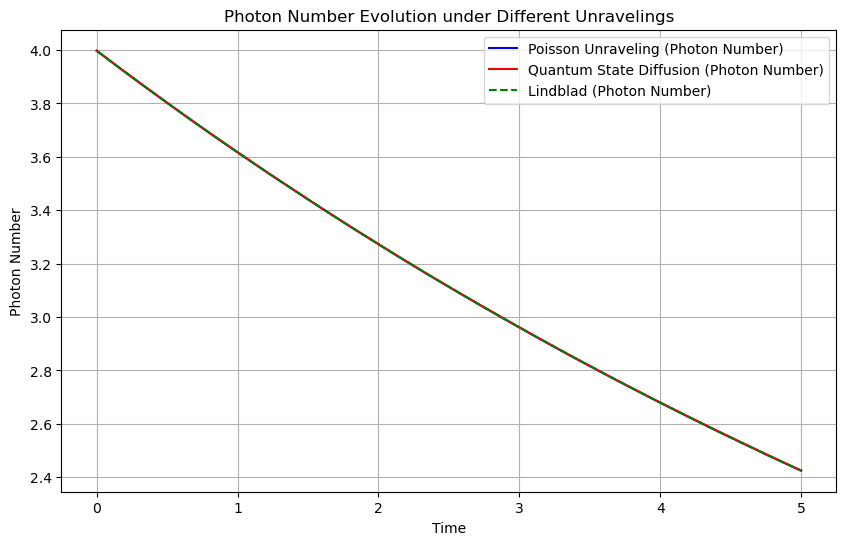

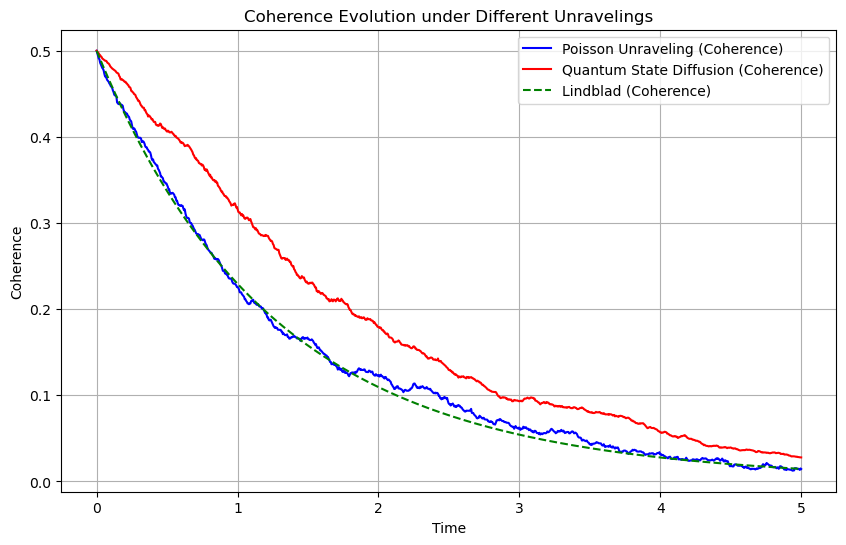

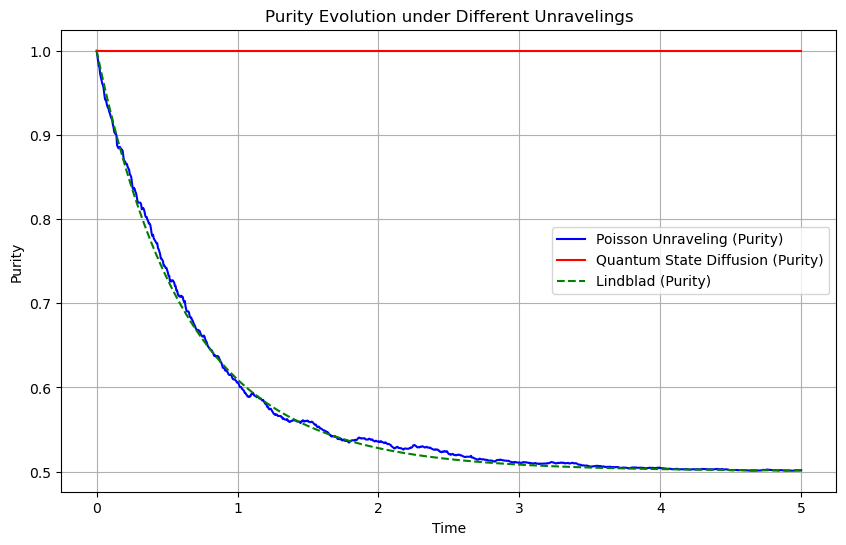

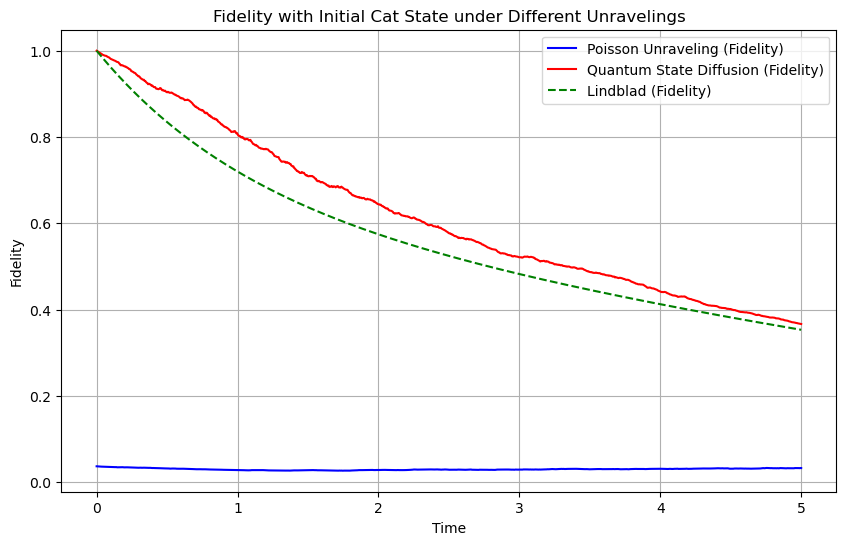

In [25]:
# ------------------------------
# Plot Results
# ------------------------------

# Plot Parity
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_parity, label="Poisson Unraveling (Parity)", color='blue')
plt.plot(times, qsd_parity, label="Quantum State Diffusion (Parity)", color='red')
plt.plot(times, lindblad_parity, label="Lindblad (Parity)", linestyle="--", color='green')
plt.title("Parity Evolution under Different Unravelings")
plt.xlabel("Time")
plt.ylabel("Parity")
plt.legend()
plt.grid()
plt.show()

# Plot Photon Number
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_photon_number, label="Poisson Unraveling (Photon Number)", color='blue')
plt.plot(times, qsd_photon_number, label="Quantum State Diffusion (Photon Number)", color='red')
plt.plot(times, lindblad_photon_number, label="Lindblad (Photon Number)", linestyle="--", color='green')
plt.title("Photon Number Evolution under Different Unravelings")
plt.xlabel("Time")
plt.ylabel("Photon Number")
plt.legend()
plt.grid()
plt.show()

# Plot Coherence
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_coherence, label="Poisson Unraveling (Coherence)", color='blue')
plt.plot(times, qsd_coherence, label="Quantum State Diffusion (Coherence)", color='red')
plt.plot(times, lindblad_coherence, label="Lindblad (Coherence)", linestyle="--", color='green')
plt.title("Coherence Evolution under Different Unravelings")
plt.xlabel("Time")
plt.ylabel("Coherence")
plt.legend()
plt.grid()
plt.show()

# Plot Purity
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_purity, label="Poisson Unraveling (Purity)", color='blue')
plt.plot(times, qsd_purity, label="Quantum State Diffusion (Purity)", color='red')
plt.plot(times, lindblad_purity, label="Lindblad (Purity)", linestyle="--", color='green')
plt.title("Purity Evolution under Different Unravelings")
plt.xlabel("Time")
plt.ylabel("Purity")
plt.legend()
plt.grid()
plt.show()

# Plot Fidelity
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_fidelity, label="Poisson Unraveling (Fidelity)", color='blue')
plt.plot(times, qsd_fidelity, label="Quantum State Diffusion (Fidelity)", color='red')
plt.plot(times, lindblad_fidelity, label="Lindblad (Fidelity)", linestyle="--", color='green')
plt.title("Fidelity with Initial Cat State under Different Unravelings")
plt.xlabel("Time")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.show()


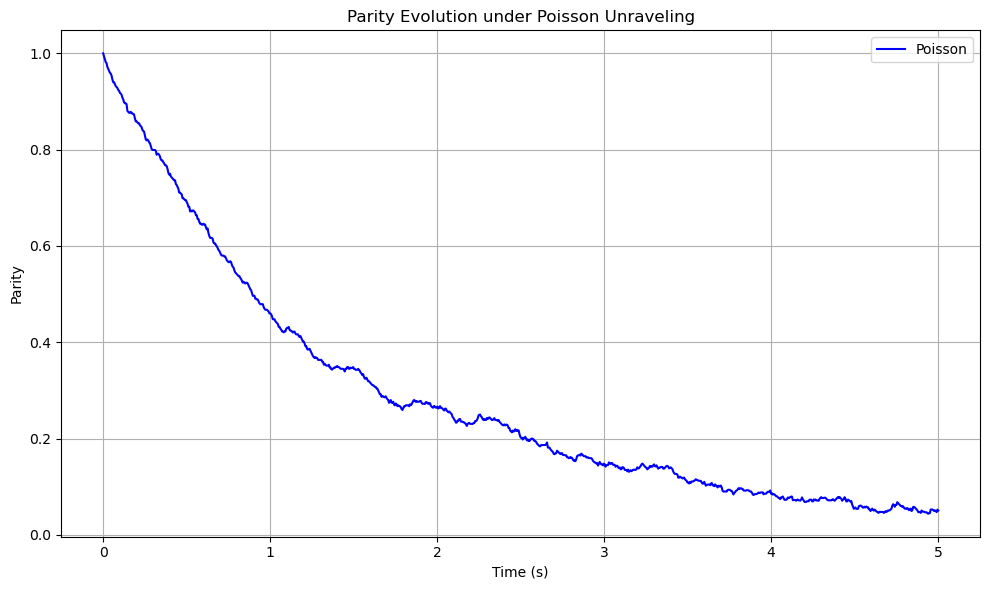

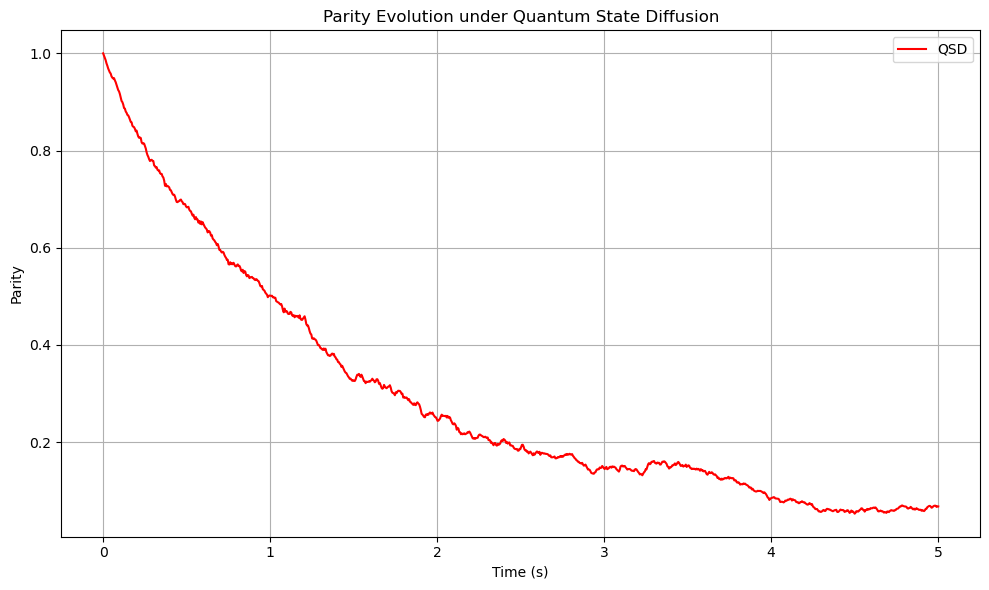

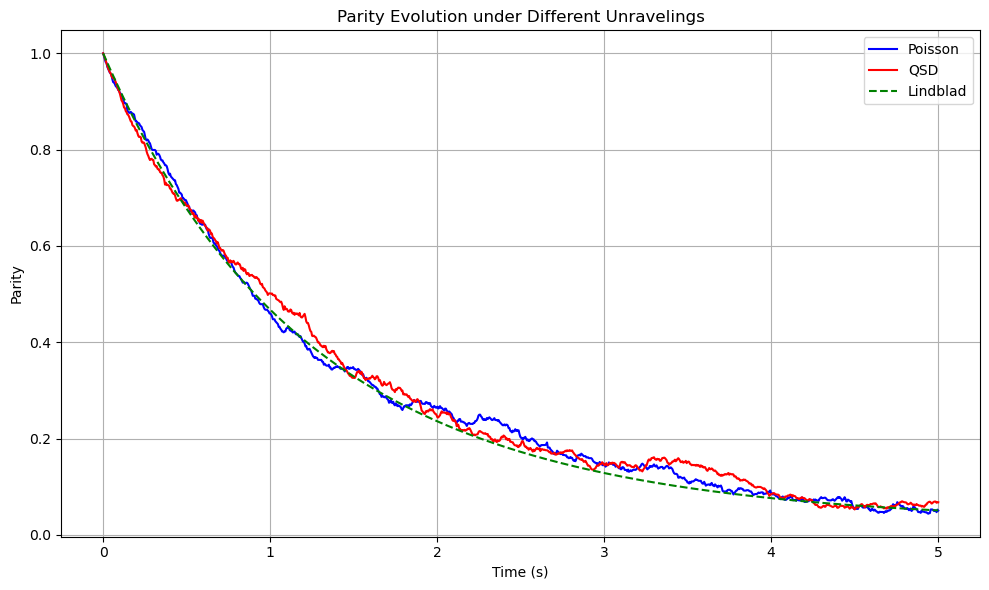

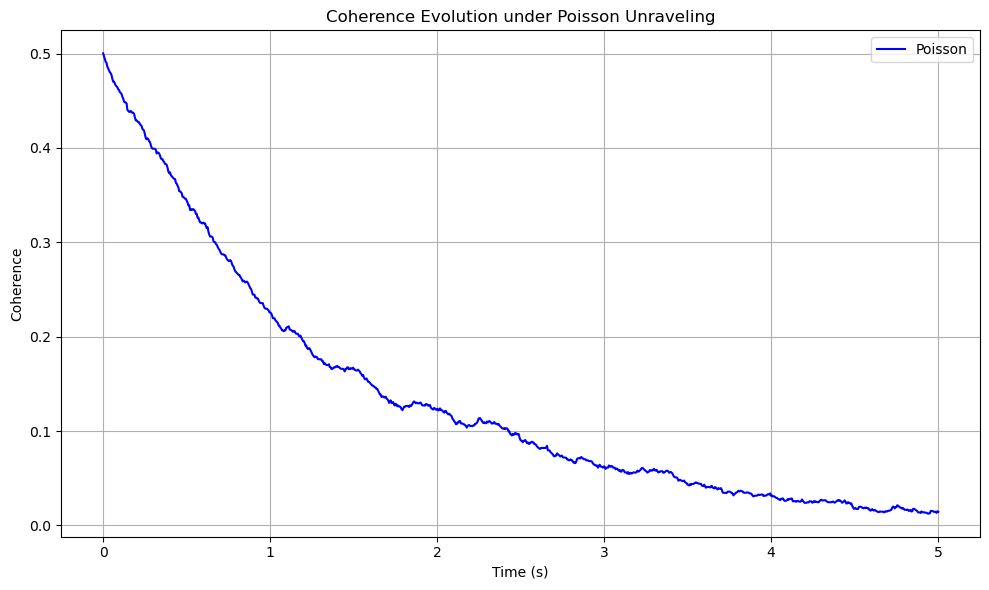

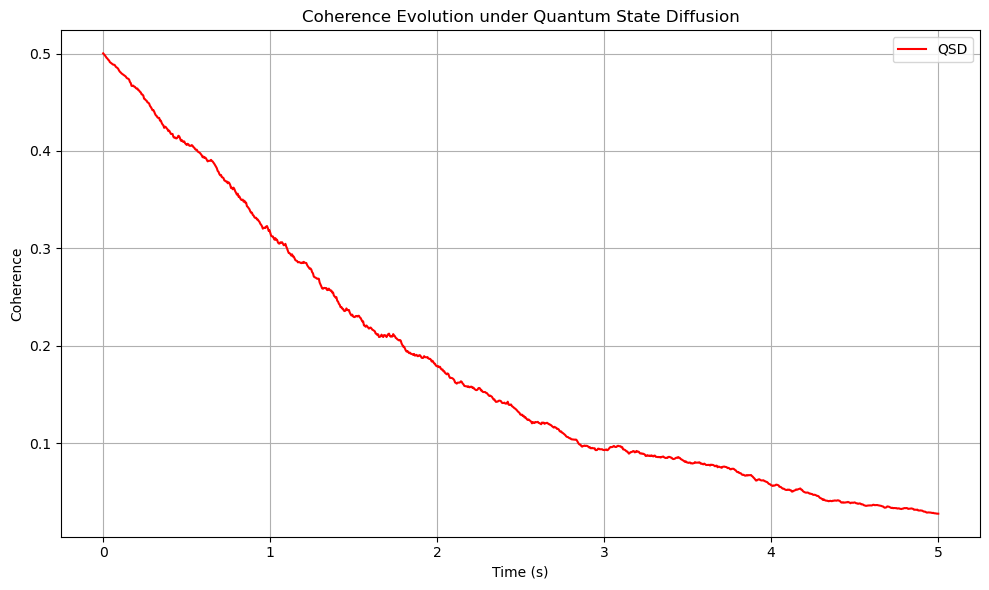

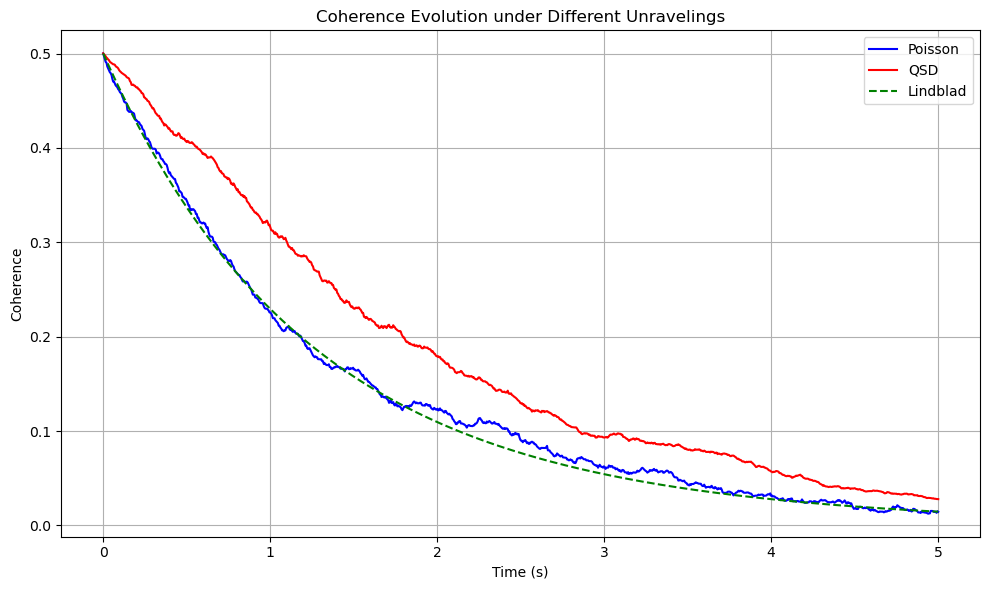

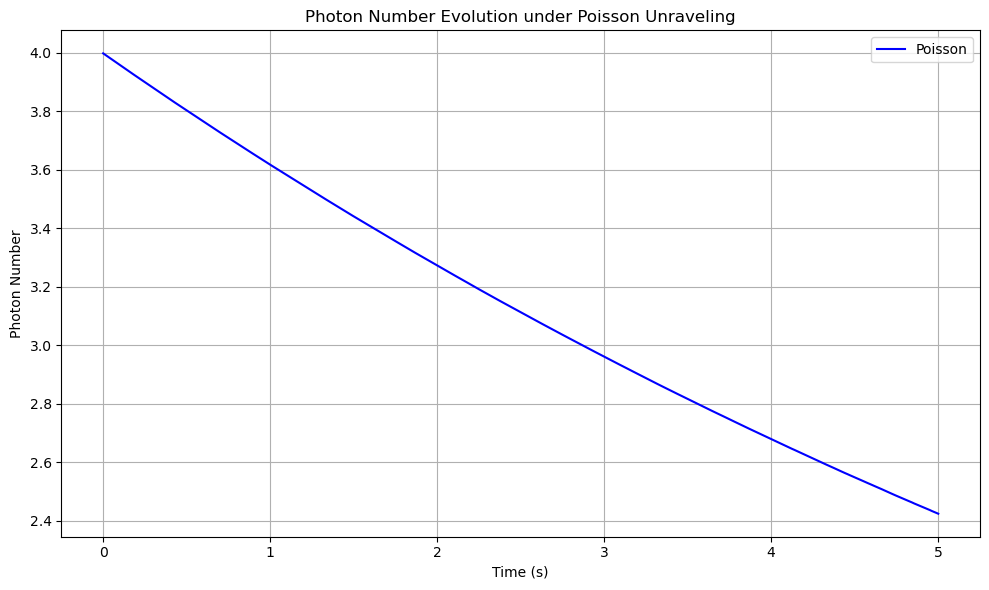

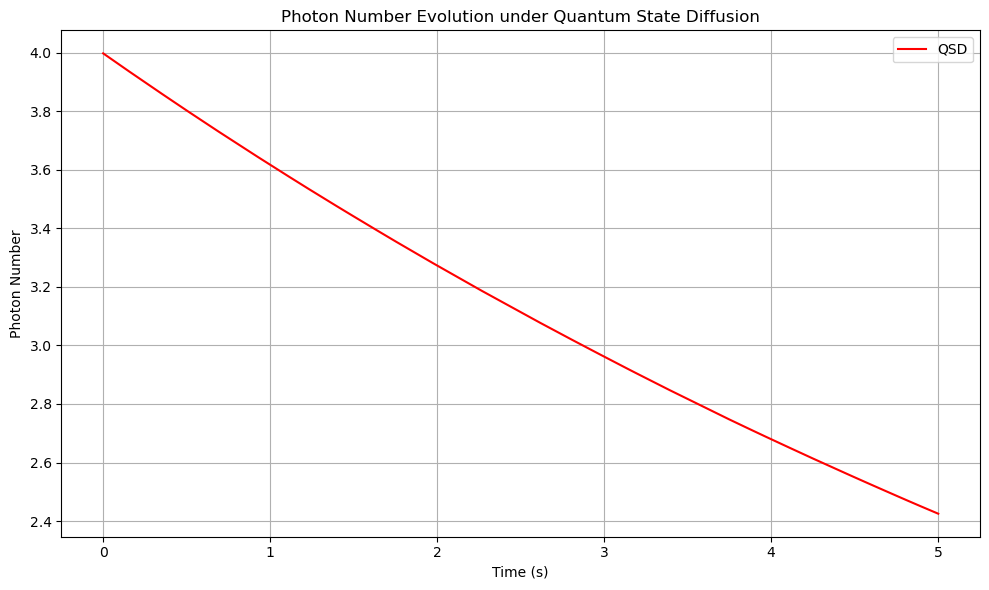

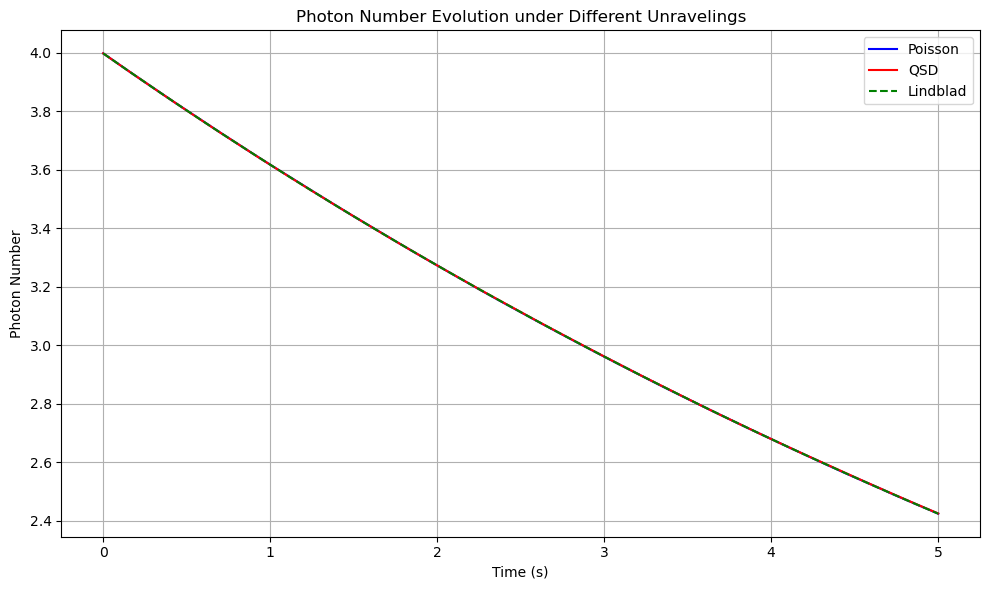

In [ ]:
# ------------------------------
# Plot Results Separately
# ------------------------------

# ------------------------------
# Parity Plots
# ------------------------------

# Poisson Parity
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_parity, color='blue', label='Poisson')
plt.title("Parity Evolution under Poisson Unraveling")
plt.xlabel("Time (s)")  # Assuming 's' as units for time
plt.ylabel("Parity")
plt.legend()
plt.grid(True)
plt.tight_layout()  # Optimize layout to prevent clipping of labels and titles
plt.savefig(os.path.join(img_path, 'parity_evolution_poisson.pdf'))  # Save as PDF
plt.show()

# QSD Parity
plt.figure(figsize=(10, 6))
plt.plot(times, qsd_parity, color='red', label='QSD')
plt.title("Parity Evolution under Quantum State Diffusion")
plt.xlabel("Time (s)")
plt.ylabel("Parity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(img_path, 'parity_evolution_qsd.pdf'))  # Save as PDF
plt.show()

# Poisson, QSD, Lindblad Parity
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_parity, label="Poisson", color='blue')
plt.plot(times, qsd_parity, label="QSD", color='red')
plt.plot(times, lindblad_parity, label="Lindblad", linestyle="--", color='green')
plt.title("Parity Evolution under Different Unravelings")
plt.xlabel("Time (s)")
plt.ylabel("Parity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(img_path, 'parity_evolution_all.pdf'))  # Save as PDF
plt.show()

# ------------------------------
# Coherence Plots
# ------------------------------

# Poisson Coherence
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_coherence, color='blue', label='Poisson')
plt.title("Coherence Evolution under Poisson Unraveling")
plt.xlabel("Time (s)")
plt.ylabel("Coherence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(img_path, 'coherence_evolution_poisson.pdf'))  # Save as PDF
plt.show()

# QSD Coherence
plt.figure(figsize=(10, 6))
plt.plot(times, qsd_coherence, color='red', label='QSD')
plt.title("Coherence Evolution under Quantum State Diffusion")
plt.xlabel("Time (s)")
plt.ylabel("Coherence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(img_path, 'coherence_evolution_qsd.pdf'))  # Save as PDF
plt.show()

# Poisson, QSD, Lindblad Coherence
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_coherence, label="Poisson", color='blue')
plt.plot(times, qsd_coherence, label="QSD", color='red')
plt.plot(times, lindblad_coherence, label="Lindblad", linestyle="--", color='green')
plt.title("Coherence Evolution under Different Unravelings")
plt.xlabel("Time (s)")
plt.ylabel("Coherence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(img_path, 'coherence_evolution_all.pdf'))  # Save as PDF
plt.show()

# ------------------------------
# Photon Number Plots
# ------------------------------

# Poisson Photon Number
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_photon_number, label="Poisson", color='blue')
plt.title("Photon Number Evolution under Poisson Unraveling")
plt.xlabel("Time (s)")
plt.ylabel("Photon Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(img_path, 'photon_number_poisson.pdf'))  # Save as PDF
plt.show()

# QSD Photon Number
plt.figure(figsize=(10, 6))
plt.plot(times, qsd_photon_number, label="QSD", color='red')
plt.title("Photon Number Evolution under Quantum State Diffusion")
plt.xlabel("Time (s)")
plt.ylabel("Photon Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(img_path, 'photon_number_qsd.pdf'))  # Save as PDF
plt.show()

# Poisson, QSD, Lindblad Photon Number
plt.figure(figsize=(10, 6))
plt.plot(times, poisson_photon_number, label="Poisson", color='blue')
plt.plot(times, qsd_photon_number, label="QSD", color='red')
plt.plot(times, lindblad_photon_number, label="Lindblad", linestyle="--", color='green')
plt.title("Photon Number Evolution under Different Unravelings")
plt.xlabel("Time (s)")
plt.ylabel("Photon Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(img_path, 'photon_number_all.pdf'))  # Save as PDF
plt.show()


10.0%. Run time:   3.05s. Est. time left: 00:00:00:27
20.0%. Run time:   5.93s. Est. time left: 00:00:00:23
30.0%. Run time:   8.86s. Est. time left: 00:00:00:20
40.0%. Run time:  11.42s. Est. time left: 00:00:00:17
50.0%. Run time:  14.70s. Est. time left: 00:00:00:14
60.0%. Run time:  19.08s. Est. time left: 00:00:00:12
70.0%. Run time:  22.77s. Est. time left: 00:00:00:09
80.0%. Run time:  27.31s. Est. time left: 00:00:00:06
90.0%. Run time:  30.72s. Est. time left: 00:00:00:03
100.0%. Run time:  33.00s. Est. time left: 00:00:00:00
Total run time:  33.25s


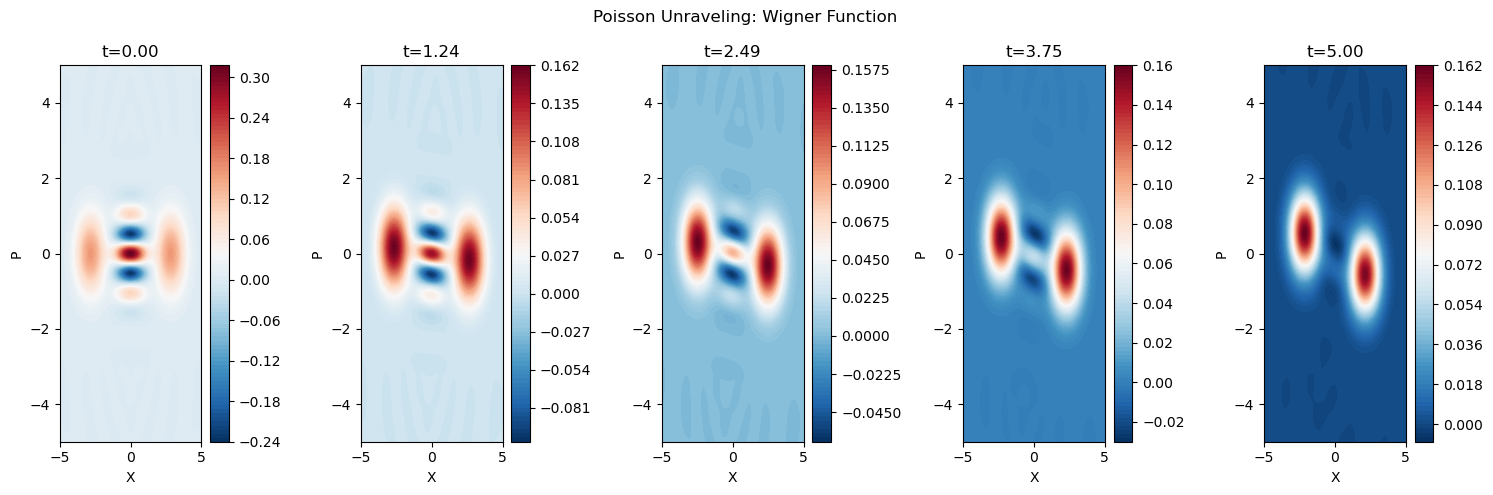

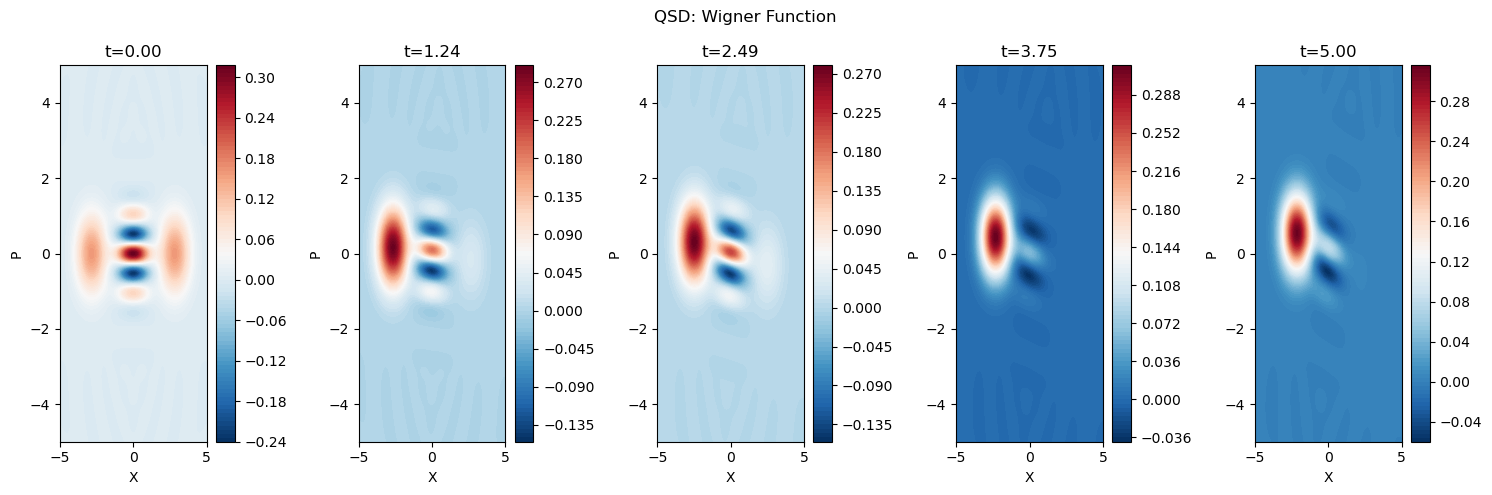

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import (
    coherent,
    destroy,
    mcsolve,
    wigner,
    Qobj,
    basis,
)

# Parameters
alpha = 2.0             # Coherent state amplitude
kappa = 0.1             # Photon loss rate
t_max = 5.0             # Maximum simulation time
n_steps = 500           # Number of time steps
dim = 20                # Hilbert space dimension
num_trajectories_poisson = 100  # Trajectories for Poisson
num_trajectories_qsd = 100  # Trajectories for QSD
dt = t_max / n_steps    # Time step size

# Operators
a = destroy(dim)  # Annihilation operator

# Initial Schrödinger cat state
cat_state = (coherent(dim, alpha) + coherent(dim, -alpha)).unit()

# System Hamiltonian (e.g., cavity field energy with detuning)
Delta = 0.05  # Detuning (set to zero if not applicable)
H = Delta * a.dag() * a  # Example Hamiltonian

# Lindblad operators for homodyne detection
L1 = np.sqrt(kappa / 2) * (a + 1j * alpha)
L2 = 1j * np.sqrt(kappa / 2) * (a - 1j * alpha)
collapse_ops = [L1, L2]

# Time evolution
times = np.linspace(0, t_max, n_steps)

# ------------------------------
# Poisson Unraveling (mcsolve)
# ------------------------------
poisson_result = mcsolve(
    H,  # Hamiltonian
    cat_state,
    times,
    c_ops=collapse_ops,
    ntraj=num_trajectories_poisson,
)

# ------------------------------
# Quantum State Diffusion (QSD)
# ------------------------------
qsd_states = [cat_state]
state = cat_state
np.random.seed(42)  # For reproducibility

for t in times[:-1]:
    # Expectation values
    L1_exp = expect(L1, state)
    L2_exp = expect(L2, state)

    # Wiener increments
    dW1 = np.sqrt(dt) * np.random.randn()
    dW2 = np.sqrt(dt) * np.random.randn()

    # Deterministic evolution term
    deterministic = (
        -1j * H * state * dt
        + (L1_exp.conjugate() * L1 - 0.5 * (L1.dag() * L1 + np.abs(L1_exp)**2)) * state * dt
        + (L2_exp.conjugate() * L2 - 0.5 * (L2.dag() * L2 + np.abs(L2_exp)**2)) * state * dt
    )

    # Stochastic evolution term
    stochastic = (
        1 / np.sqrt(2) * ((L1 - L1_exp) * state * dW1
        + (L2 - L2_exp) * state * dW2)
    )

    # Update state and normalize
    state = (state + deterministic + stochastic).unit()
    qsd_states.append(state)

# ------------------------------
# Wigner Function Snapshots
# ------------------------------

def plot_wigner_snapshots(states, title, times, n_steps, x_range=5, y_range=5):
    x = np.linspace(-x_range, x_range, 200)
    y = np.linspace(-y_range, y_range, 200)
    X, Y = np.meshgrid(x, y)

    # Select 5 evenly spaced snapshots
    snapshot_indices = np.linspace(0, len(states) - 1, 5, dtype=int)
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))

    for i, idx in enumerate(snapshot_indices):
        state = states[idx]
        W = wigner(state, x, y)
        ax = axes[i]
        c = ax.contourf(X, Y, W, 100, cmap="RdBu_r")
        ax.set_title(f"t={times[idx]:.2f}")
        ax.set_xlabel("X")
        ax.set_ylabel("P")
        fig.colorbar(c, ax=ax)

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Poisson unraveling snapshots
plot_wigner_snapshots(poisson_result.states, "Poisson Unraveling: Wigner Function", times, n_steps)

# QSD unraveling snapshots
plot_wigner_snapshots(qsd_states, "QSD: Wigner Function", times, n_steps)


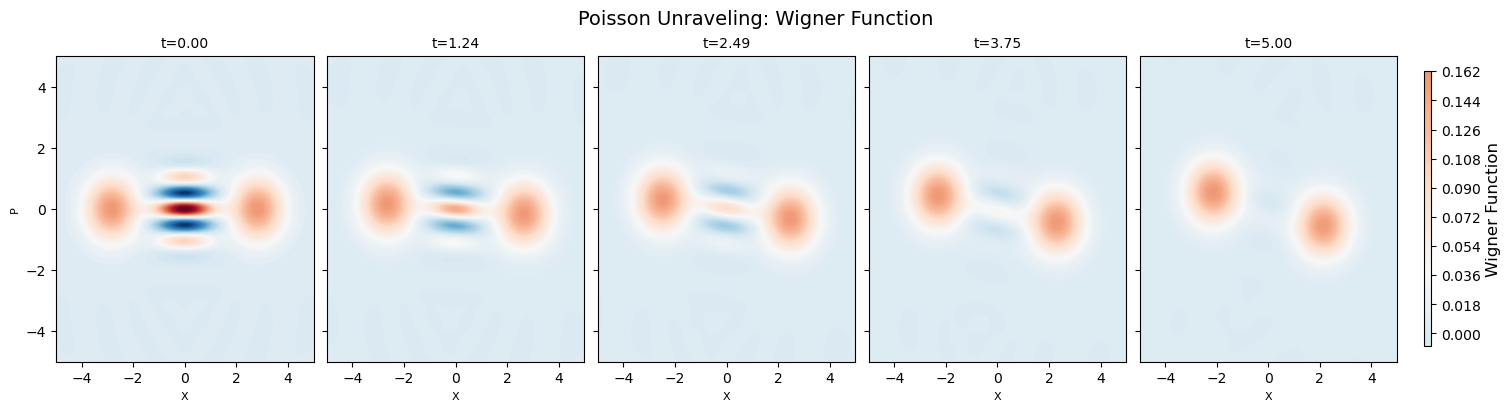

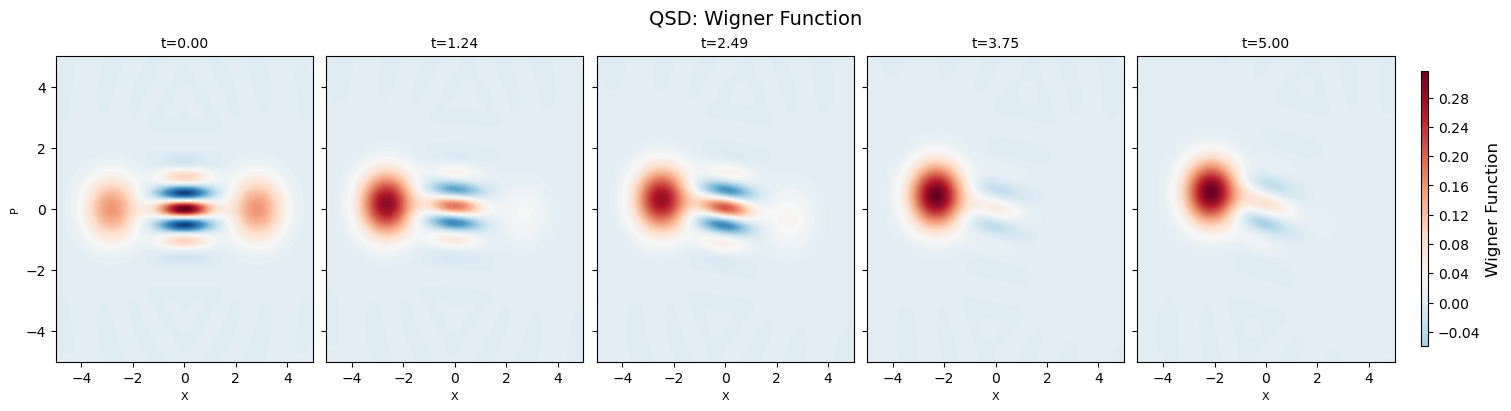

In [ ]:
# ------------------------------
# Wigner Function Snapshots (Optimized for Beamer)
# ------------------------------

def save_wigner_snapshots(
    states, title, times, n_steps, x_range=5, y_range=5, filename="wigner_snapshots"
):
    x = np.linspace(-x_range, x_range, 200)
    y = np.linspace(-y_range, y_range, 200)
    X, Y = np.meshgrid(x, y)

    # Compute global min and max across all states for consistent color scale
    global_min, global_max = float("inf"), float("-inf")
    for state in states:
        W = wigner(state, x, y)
        global_min = min(global_min, W.min())
        global_max = max(global_max, W.max())

    # Select 5 evenly spaced snapshots
    snapshot_indices = np.linspace(0, len(states) - 1, 5, dtype=int)

    # Create the figure and axes with constrained layout
    fig, axes = plt.subplots(
        1, 5, figsize=(15, 4), sharey=True, constrained_layout=True
    )

    # Plot each snapshot
    for i, idx in enumerate(snapshot_indices):
        state = states[idx]
        W = wigner(state, x, y)
        ax = axes[i]
        im = ax.contourf(
            X, Y, W, 100, cmap="RdBu_r", vmin=global_min, vmax=global_max
        )
        ax.set_title(f"t={times[idx]:.2f}", fontsize=10)
        ax.set_xlabel("X", fontsize=8)
        if i == 0:
            ax.set_ylabel("P", fontsize=8)

    # Add a single color bar for the entire figure
    cbar = fig.colorbar(
        im, ax=axes, location="right", aspect=40, shrink=0.9, pad=0.02
    )
    cbar.set_label("Wigner Function", fontsize=12)

    # Save the figure in tight layout
    fig.suptitle(title, fontsize=14)
    plt.savefig(os.path.join(img_path, f"{filename}.pdf"), format="pdf", bbox_inches="tight", dpi=300)
    plt.savefig(os.path.join(img_path, f"{filename}.pdf"), format="pdf", bbox_inches="tight", dpi=300)
    plt.show()


# Save Poisson unraveling snapshots
save_wigner_snapshots(
    poisson_result.states,
    "Poisson Unraveling: Wigner Function",
    times,
    n_steps,
    filename="poisson_wigner",
)

# Save QSD unraveling snapshots
save_wigner_snapshots(
    qsd_states,
    "QSD: Wigner Function",
    times,
    n_steps,
    filename="qsd_wigner",
)


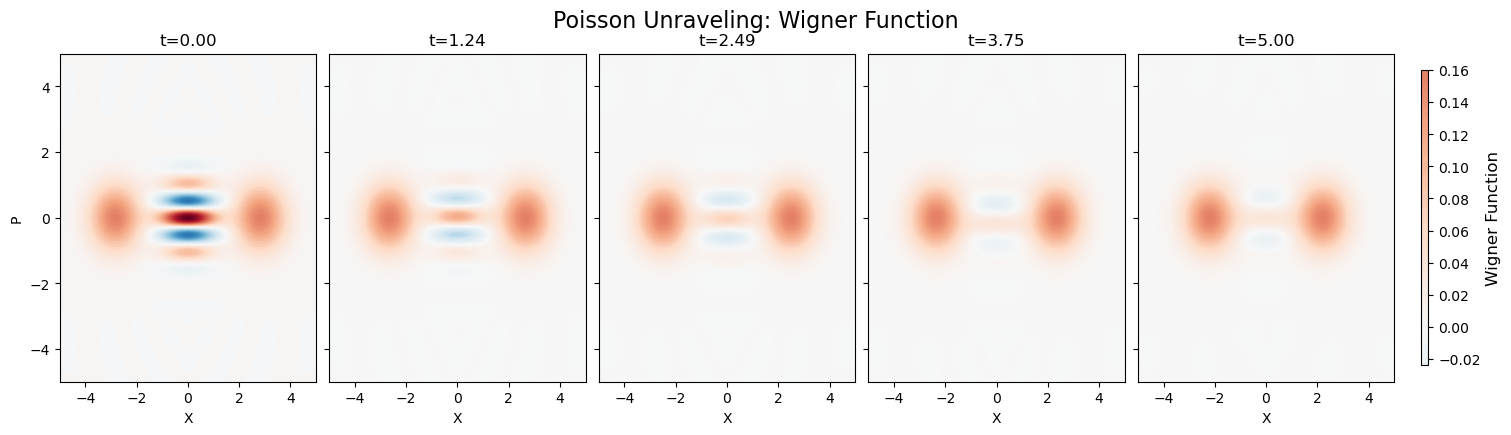

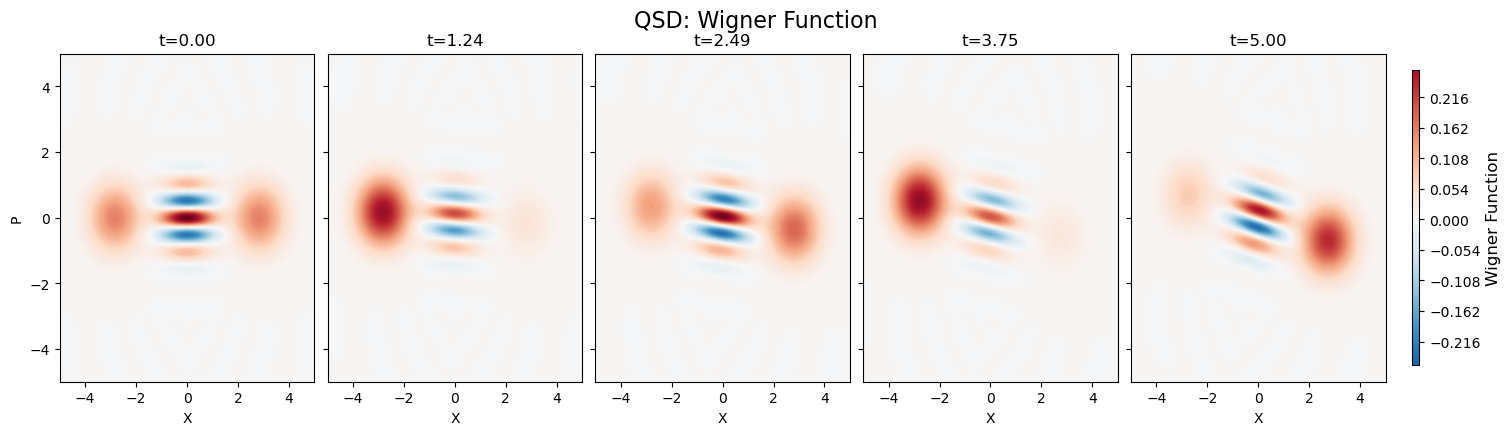

In [ ]:
import matplotlib.colors as mcolors

def plot_wigner_snapshots_improved(states, title, times, n_steps, x_range=5, y_range=5):
    x = np.linspace(-x_range, x_range, 200)
    y = np.linspace(-y_range, y_range, 200)
    X, Y = np.meshgrid(x, y)

    # Compute global min and max across all states for consistent color scale
    global_min, global_max = float("inf"), float("-inf")
    for state in states:
        W = wigner(state, x, y)
        global_min = min(global_min, W.min())
        global_max = max(global_max, W.max())

    # Define a symmetric color scale (centered on 0) for better balance
    abs_max = max(abs(global_min), global_max)

    # Select 5 evenly spaced snapshots
    snapshot_indices = np.linspace(0, len(states) - 1, 5, dtype=int)

    # Create the figure and axes with constrained layout
    fig, axes = plt.subplots(
        1, 5, figsize=(15, 4), sharey=True, constrained_layout=True
    )

    # Plot each snapshot
    for i, idx in enumerate(snapshot_indices):
        state = states[idx]
        W = wigner(state, x, y)
        ax = axes[i]
        im = ax.contourf(
            X, Y, W, 100, cmap="RdBu_r", vmin=-abs_max, vmax=abs_max, 
            norm=mcolors.Normalize(vmin=-abs_max, vmax=abs_max)
        )
        ax.set_title(f"t={times[idx]:.2f}")
        ax.set_xlabel("X")
        if i == 0:
            ax.set_ylabel("P")

    # Add a single color bar for the entire figure
    cbar = fig.colorbar(
        im, ax=axes, location="right", aspect=40, shrink=0.9, pad=0.02
    )
    cbar.set_label("Wigner Function", fontsize=12)
    fig.suptitle(title, fontsize=16, y=1.05)
    plt.show()

# Poisson unraveling snapshots
plot_wigner_snapshots_improved(poisson_result.states, "Poisson Unraveling: Wigner Function", times, n_steps)

# QSD unraveling snapshots
plot_wigner_snapshots_improved(qsd_states, "QSD: Wigner Function", times, n_steps)


10.0%. Run time:   2.41s. Est. time left: 00:00:00:21
20.0%. Run time:   4.97s. Est. time left: 00:00:00:19
30.0%. Run time:   7.31s. Est. time left: 00:00:00:17
40.0%. Run time:   9.90s. Est. time left: 00:00:00:14
50.0%. Run time:  12.74s. Est. time left: 00:00:00:12
60.0%. Run time:  14.97s. Est. time left: 00:00:00:09
70.0%. Run time:  17.37s. Est. time left: 00:00:00:07
80.0%. Run time:  19.75s. Est. time left: 00:00:00:04
90.0%. Run time:  21.73s. Est. time left: 00:00:00:02
100.0%. Run time:  26.61s. Est. time left: 00:00:00:00
Total run time:  27.03s


/var/folders/z9/4q0cctmj41d0drmc3j9l61y00000gn/T/ipykernel_92229/1591689509.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


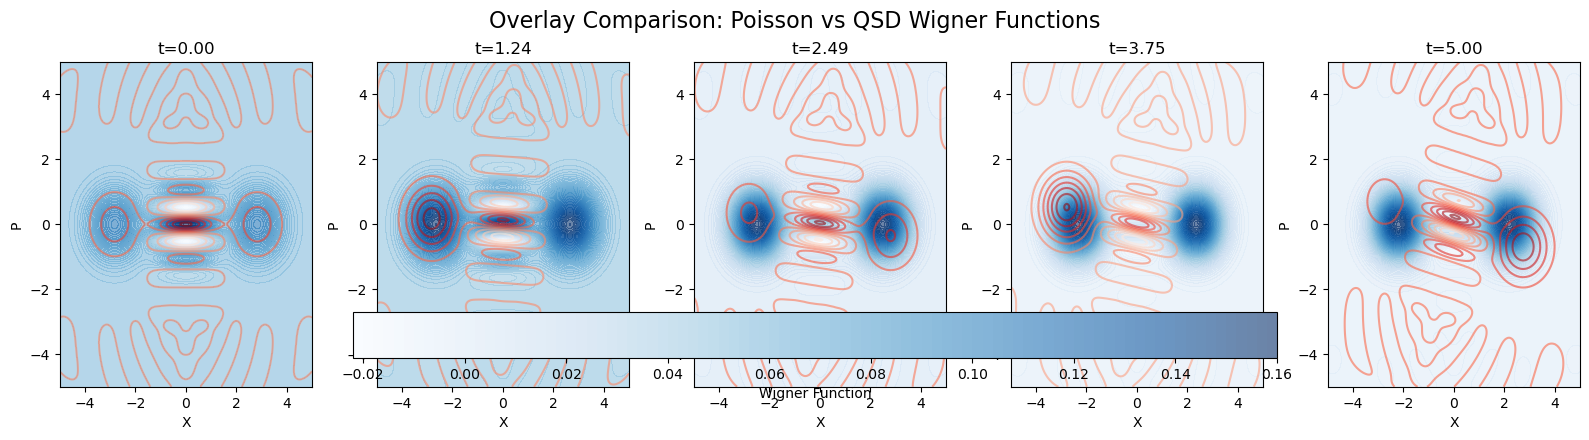

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import coherent, destroy, mcsolve, expect, Qobj, wigner

# Parameters
alpha = 2.0             # Coherent state amplitude
kappa = 0.1             # Photon loss rate
t_max = 5.0             # Maximum simulation time
n_steps = 500           # Number of time steps
dim = 20                # Hilbert space dimension
num_trajectories_poisson = 100  # Trajectories for Poisson
num_trajectories_qsd = 100  # Trajectories for QSD
dt = t_max / n_steps    # Time step size

# Operators
a = destroy(dim)  # Annihilation operator

# Initial Schrödinger cat state
cat_state = (coherent(dim, alpha) + coherent(dim, -alpha)).unit()

# Lindblad operators from the thought experiment
L1 = np.sqrt(kappa / 2) * (a + 1j * alpha)
L2 = 1j * np.sqrt(kappa / 2) * (a - 1j * alpha)
collapse_ops = [L1, L2]

# Time evolution
times = np.linspace(0, t_max, n_steps)

# ------------------------------
# Poisson Unraveling (mcsolve)
# ------------------------------
poisson_result = mcsolve(
    Qobj(np.zeros((dim, dim))),  # No Hamiltonian
    cat_state,
    times,
    c_ops=collapse_ops,
    ntraj=num_trajectories_poisson,
)

# ------------------------------
# Quantum State Diffusion (QSD)
# ------------------------------
qsd_trajectory_states = []  # Collect states during the QSD simulation

np.random.seed(42)  # For reproducibility
for traj in range(num_trajectories_qsd):
    state = cat_state  # Reset state for each trajectory
    trajectory_states = [state]  # Include the initial state

    for t in times[:-1]:  # Iterate over all but the last time step
        # Expectation values for the collapse operators
        L1_exp = (state.dag() * L1 * state)
        L2_exp = (state.dag() * L2 * state)

        # Wiener increments
        dW1 = np.sqrt(dt) * np.random.randn()
        dW2 = np.sqrt(dt) * np.random.randn()

        # Effective Hamiltonian
        H_eff = -1j * (L1.dag() * L1 + L2.dag() * L2) / 2
        deterministic = H_eff * state * dt

        # Stochastic evolution
        stochastic = (
            (L1 - L1_exp) * state * dW1 + (L2 - L2_exp) * state * dW2
        )

        # Update state
        state = (state + deterministic + stochastic).unit()
        trajectory_states.append(state)  # Append the new state

    qsd_trajectory_states.append(trajectory_states)




/var/folders/z9/4q0cctmj41d0drmc3j9l61y00000gn/T/ipykernel_92229/2753455442.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


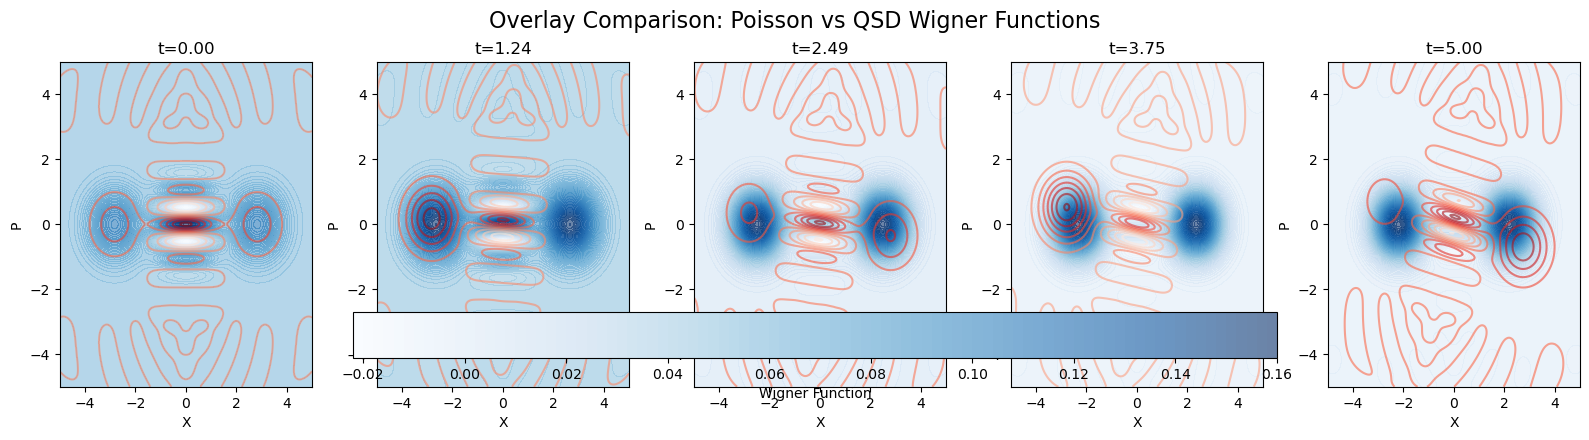

In [3]:
# ------------------------------
# Overlay Comparison of Wigner Functions
# ------------------------------
x = np.linspace(-5, 5, 200)
p = np.linspace(-5, 5, 200)
X, P = np.meshgrid(x, p)

snapshot_indices = np.linspace(0, n_steps - 1, 5, dtype=int)  # Five snapshots
snapshot_times = times[snapshot_indices]

fig, axes = plt.subplots(1, len(snapshot_indices), figsize=(16, 4))
fig.suptitle("Overlay Comparison: Poisson vs QSD Wigner Functions", fontsize=16)

for idx, (snap_idx, ax) in enumerate(zip(snapshot_indices, axes)):
    # Compute Wigner functions for the current time step

    # Use Poisson state directly from mcsolve
    poisson_wigner = wigner(poisson_result.states[snap_idx], x, p)
    
    # Extract the corresponding QSD state as a valid Qobj
    qsd_state = qsd_trajectory_states[0][snap_idx]  # Use the first trajectory
    qsd_wigner = wigner(qsd_state, x, p)

    # Overlay Wigner functions
    cont_poisson = ax.contourf(X, P, poisson_wigner, levels=100, cmap="Blues", alpha=0.6)
    cont_qsd = ax.contour(X, P, qsd_wigner, levels=10, cmap="Reds", alpha=0.6)

    # Add labels and titles
    ax.set_title(f"t={snapshot_times[idx]:.2f}")
    ax.set_xlabel("X")
    ax.set_ylabel("P")

# Add a shared colorbar for the Wigner function
fig.colorbar(cont_poisson, ax=axes.ravel().tolist(), orientation="horizontal", label="Wigner Function")

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Leave space for the main title
plt.show()

/Users/EricSung/opt/anaconda3/envs/open_quantum_systems_env/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

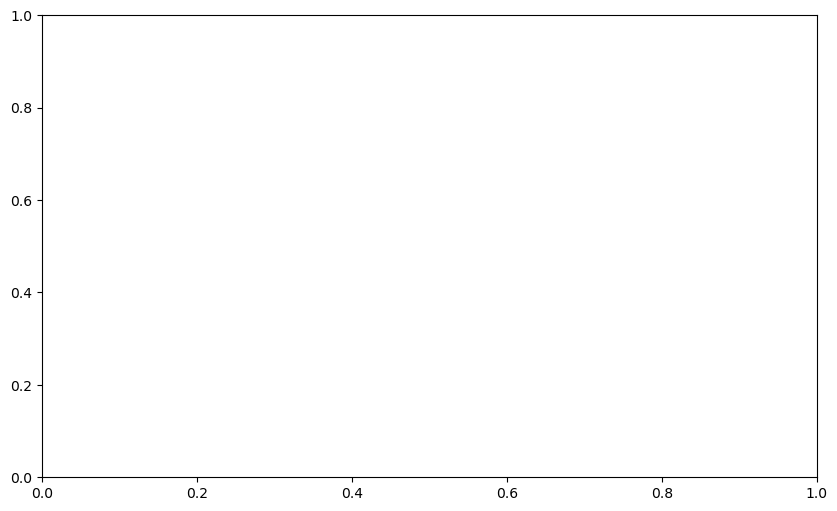

In [142]:
import matplotlib.pyplot as plt
import numpy as np

def plot_trajectories(title, x_label, y_label, times, all_trajectories, avg_trajectory, labels, colors, num_to_show=5):
    plt.figure(figsize=(10, 6))
    # Plot individual trajectories
    for i in range(min(num_to_show, len(all_trajectories))):
        plt.plot(times, all_trajectories[i], color=colors[0], alpha=0.3, label=labels[0] if i == 0 else "_nolegend_")

    # Plot the average trajectory
    plt.plot(times, avg_trajectory, color=colors[1], linewidth=2, label=labels[1])

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Select a few trajectories to plot
num_trajectories_to_show = 10  # How many individual trajectories to display

# Poisson trajectories
plot_trajectories(
    "Individual Trajectories for Poisson Unraveling - Parity",
    "Time (s)",
    "Parity",
    times,
    poisson_result.states[:num_trajectories_to_show],  # Assuming states are stored individually per trajectory
    np.mean([expect(parity_op, state) for state in poisson_result.states], axis=0),  # Calculate average across all trajectories
    ["Individual Trajectories", "Average"],
    ["blue", "red"]
)

# QSD trajectories
plot_trajectories(
    "Individual Trajectories for QSD - Parity",
    "Time (s)",
    "Parity",
    times,
    [expect(parity_op, states) for states in qsd_trajectory_parity[:num_trajectories_to_show]],  # Assuming each row is a trajectory
    np.mean(qsd_trajectory_parity, axis=0),  # Calculate average across all trajectories
    ["Individual Trajectories", "Average"],
    ["green", "black"]
)


# Actual Unraveling Codes With Multiple Trajectories

## Poisson Unraveling

10.0%. Run time:   1.18s. Est. time left: 00:00:00:10
20.0%. Run time:   2.12s. Est. time left: 00:00:00:08
30.0%. Run time:   3.04s. Est. time left: 00:00:00:07
40.0%. Run time:   4.62s. Est. time left: 00:00:00:06
50.0%. Run time:   5.32s. Est. time left: 00:00:00:05
60.0%. Run time:   6.02s. Est. time left: 00:00:00:04
70.0%. Run time:   6.72s. Est. time left: 00:00:00:02
80.0%. Run time:   7.40s. Est. time left: 00:00:00:01
90.0%. Run time:   8.11s. Est. time left: 00:00:00:00
100.0%. Run time:   8.76s. Est. time left: 00:00:00:00
Total run time:   8.90s
10.0%. Run time:   1.62s. Est. time left: 00:00:00:14
20.0%. Run time:   3.12s. Est. time left: 00:00:00:12
30.0%. Run time:   4.57s. Est. time left: 00:00:00:10
40.0%. Run time:   6.04s. Est. time left: 00:00:00:09
50.0%. Run time:   7.54s. Est. time left: 00:00:00:07
60.0%. Run time:   9.12s. Est. time left: 00:00:00:06
70.0%. Run time:  11.29s. Est. time left: 00:00:00:04
80.0%. Run time:  13.45s. Est. time left: 00:00:00:03
90.

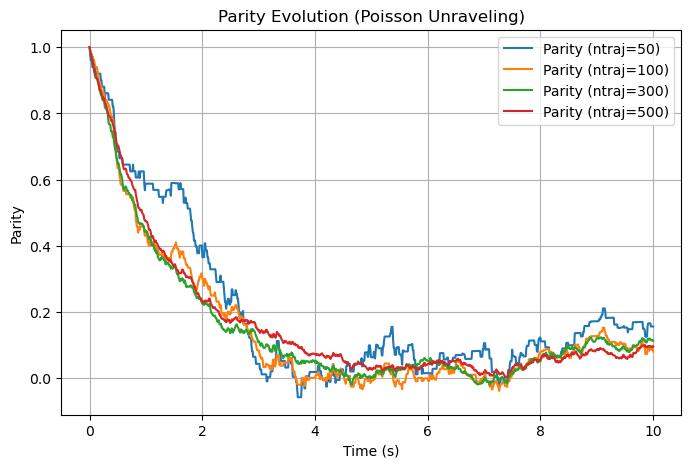

10.0%. Run time:   0.69s. Est. time left: 00:00:00:06
20.0%. Run time:   1.42s. Est. time left: 00:00:00:05
30.0%. Run time:   2.17s. Est. time left: 00:00:00:05
40.0%. Run time:   2.92s. Est. time left: 00:00:00:04
50.0%. Run time:   3.68s. Est. time left: 00:00:00:03
60.0%. Run time:   4.69s. Est. time left: 00:00:00:03
70.0%. Run time:   6.15s. Est. time left: 00:00:00:02
80.0%. Run time:   7.15s. Est. time left: 00:00:00:01
90.0%. Run time:   8.14s. Est. time left: 00:00:00:00
100.0%. Run time:   8.90s. Est. time left: 00:00:00:00
Total run time:   9.05s
10.0%. Run time:   1.61s. Est. time left: 00:00:00:14
20.0%. Run time:   3.33s. Est. time left: 00:00:00:13
30.0%. Run time:   4.90s. Est. time left: 00:00:00:11
40.0%. Run time:   6.50s. Est. time left: 00:00:00:09
50.0%. Run time:   8.14s. Est. time left: 00:00:00:08
60.0%. Run time:   9.81s. Est. time left: 00:00:00:06
70.0%. Run time:  11.56s. Est. time left: 00:00:00:04
80.0%. Run time:  13.14s. Est. time left: 00:00:00:03
90.

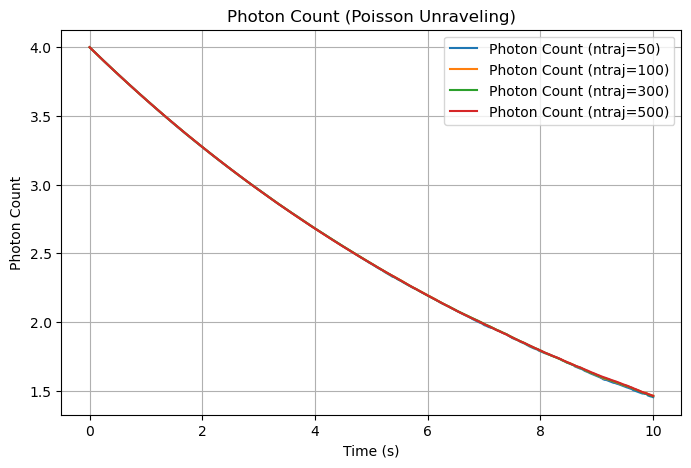

10.0%. Run time:   0.64s. Est. time left: 00:00:00:05
20.0%. Run time:   1.35s. Est. time left: 00:00:00:05
30.0%. Run time:   2.04s. Est. time left: 00:00:00:04
40.0%. Run time:   2.70s. Est. time left: 00:00:00:04
50.0%. Run time:   3.54s. Est. time left: 00:00:00:03
60.0%. Run time:   4.20s. Est. time left: 00:00:00:02
70.0%. Run time:   5.02s. Est. time left: 00:00:00:02
80.0%. Run time:   6.21s. Est. time left: 00:00:00:01
90.0%. Run time:   7.30s. Est. time left: 00:00:00:00
100.0%. Run time:   8.54s. Est. time left: 00:00:00:00
Total run time:   8.81s


/Users/EricSung/opt/anaconda3/envs/open_quantum_systems_env/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/EricSung/opt/anaconda3/envs/open_quantum_systems_env/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


10.0%. Run time:   1.73s. Est. time left: 00:00:00:15
20.0%. Run time:   3.17s. Est. time left: 00:00:00:12
30.0%. Run time:   5.15s. Est. time left: 00:00:00:12
40.0%. Run time:   6.72s. Est. time left: 00:00:00:10
50.0%. Run time:   8.20s. Est. time left: 00:00:00:08
60.0%. Run time:  10.33s. Est. time left: 00:00:00:06
70.0%. Run time:  12.49s. Est. time left: 00:00:00:05
80.0%. Run time:  15.03s. Est. time left: 00:00:00:03
90.0%. Run time:  17.68s. Est. time left: 00:00:00:01
100.0%. Run time:  20.50s. Est. time left: 00:00:00:00
Total run time:  20.77s
10.0%. Run time:   5.81s. Est. time left: 00:00:00:52
20.0%. Run time:  13.32s. Est. time left: 00:00:00:53
30.0%. Run time:  20.19s. Est. time left: 00:00:00:47
40.0%. Run time:  27.12s. Est. time left: 00:00:00:40
50.0%. Run time:  34.25s. Est. time left: 00:00:00:34
60.0%. Run time:  41.44s. Est. time left: 00:00:00:27
70.0%. Run time:  47.81s. Est. time left: 00:00:00:20
80.0%. Run time:  55.79s. Est. time left: 00:00:00:13
90.

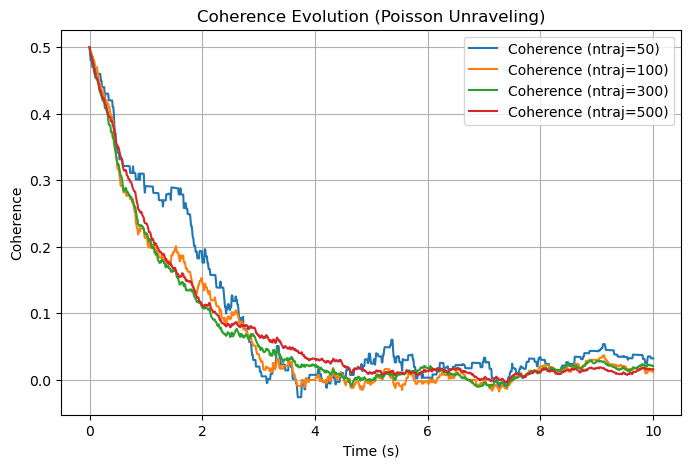

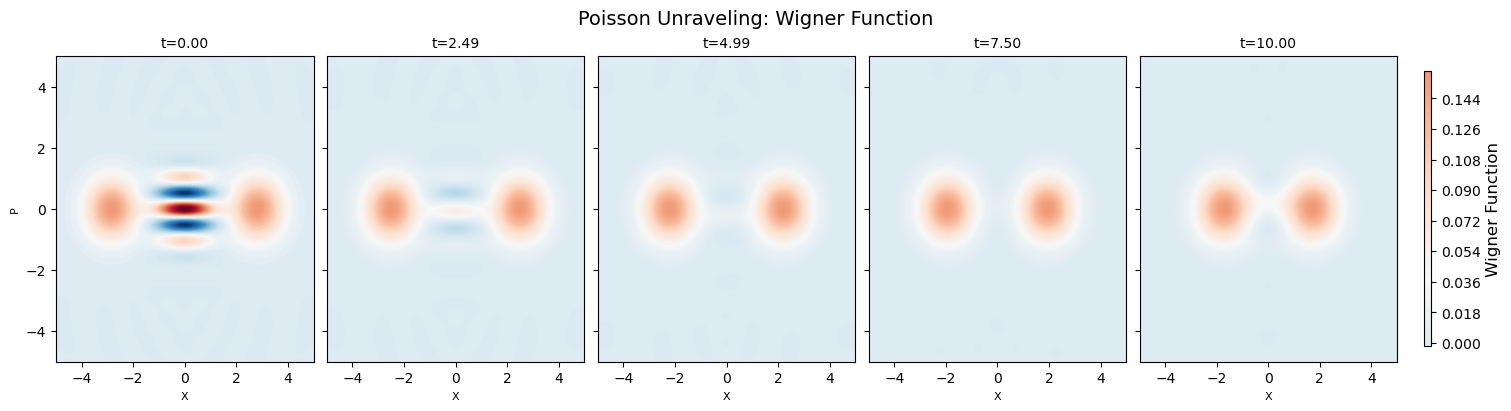

In [ ]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.0             # Coherent state amplitude
kappa = 0.1             # Photon loss rate
t_max = 10.0             # Maximum simulation time
n_steps = 1000          # Number of time steps
dim = 20                # Hilbert space dimension
dt = t_max / n_steps    # Time step size
tlist = np.linspace(0, t_max, n_steps)
poisson_seed = 42

# Initial cat state
coherent_plus = coherent(dim, alpha) + coherent(dim, -alpha)
psi_cat = coherent_plus.unit()

# Operators
a = destroy(dim)
Delta = 0.00  # Detuning (set to zero if not applicable)
H = Delta * a.dag() * a  # Example Hamiltonian
L1 = np.sqrt(kappa / 2) * (a + 1j * alpha)
L2 = 1j * np.sqrt(kappa / 2) * (a - 1j * alpha)
c_ops = [L1, L2]

# Parity operator
parity_op = sum(
    [(-1) ** n * basis(dim, n) * basis(dim, n).dag() for n in range(dim)]
)

# Photon number operator
photon_number_op = a.dag() * a

# Coherence operator (off-diagonal element between |alpha> and |-alpha>)
coherence_op = coherent(dim, alpha) * coherent(dim, -alpha).dag()

# Different ntraj values to compare
ntraj_list = [50, 100, 300, 500]
# ntraj_list = [5]

# Parity Evolution
plt.figure(figsize=(8, 5))

# Run Monte Carlo simulations and plot parity evolution
poisson_result = None  # Placeholder to store the last mcsolve result
for ntraj in ntraj_list:
    # Run Monte Carlo simulation
    mc_result = mcsolve(H, psi_cat, tlist, c_ops=c_ops, ntraj=ntraj, seeds=poisson_seed)
    poisson_result = mc_result  # Save the last result for Wigner snapshots
    # Compute parity expectation values
    poisson_parity = expect(parity_op, mc_result.states)
    # Plot the result
    plt.plot(tlist, poisson_parity, label=f"Parity (ntraj={ntraj})")

plt.xlabel("Time (s)")
plt.ylabel("Parity")
plt.title("Parity Evolution (Poisson Unraveling)")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(img_path, 'parity_evolution_poisson_multi_math599.pdf'), dpi=300)  # Save as PDF
plt.show()

# Photon Number Evolution
plt.figure(figsize=(8, 5))

for ntraj in ntraj_list:
    # Run Monte Carlo simulation (reuse mc_result)
    mc_result = mcsolve(H, psi_cat, tlist, c_ops=c_ops, ntraj=ntraj, seeds=poisson_seed)
    # Compute photon number expectation values
    photon_count = expect(photon_number_op, mc_result.states)
    # Plot the result
    plt.plot(tlist, photon_count, label=f"Photon Count (ntraj={ntraj})")

plt.xlabel("Time (s)")
plt.ylabel("Photon Count")
plt.title("Photon Count (Poisson Unraveling)")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(img_path, 'photon_count_poisson_multi_math599.pdf'), dpi=300)  # Save as PDF
plt.show()

# Coherence Evolution
plt.figure(figsize=(8, 5))

for ntraj in ntraj_list:
    # Run Monte Carlo simulation (reuse mc_result)
    mc_result = mcsolve(H, psi_cat, tlist, c_ops=c_ops, ntraj=ntraj, seeds=poisson_seed)
    # Compute coherence expectation values
    poisson_coherence_multi = expect(coherence_op, mc_result.states)
    # Plot the result
    plt.plot(tlist, poisson_coherence_multi, label=f"Coherence (ntraj={ntraj})")

plt.xlabel("Time (s)")
plt.ylabel("Coherence")
plt.title("Coherence Evolution (Poisson Unraveling)")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(img_path, 'coherence_poisson_multi_math599.pdf'), dpi=300)  # Save as PDF
plt.show()

# Function to plot Wigner snapshots
def save_wigner_snapshots(
    states, title, times, n_steps, x_range=5, y_range=5, filename="wigner_snapshots"
):
    x = np.linspace(-x_range, x_range, 200)
    y = np.linspace(-y_range, y_range, 200)
    X, Y = np.meshgrid(x, y)

    # Compute global min and max across all states for consistent color scale
    global_min, global_max = float("inf"), float("-inf")
    for state in states:
        W = wigner(state, x, y)
        global_min = min(global_min, W.min())
        global_max = max(global_max, W.max())

    # Select 5 evenly spaced snapshots
    snapshot_indices = np.linspace(0, len(states) - 1, 5, dtype=int)

    # Create the figure and axes with constrained layout
    fig, axes = plt.subplots(
        1, 5, figsize=(15, 4), sharey=True, constrained_layout=True
    )

    # Plot each snapshot
    for i, idx in enumerate(snapshot_indices):
        state = states[idx]
        W = wigner(state, x, y)
        ax = axes[i]
        im = ax.contourf(
            X, Y, W, 100, cmap="RdBu_r", vmin=global_min, vmax=global_max
        )
        ax.set_title(f"t={times[idx]:.2f}", fontsize=10)
        ax.set_xlabel("X", fontsize=8)
        if i == 0:
            ax.set_ylabel("P", fontsize=8)

    # Add a single color bar for the entire figure
    cbar = fig.colorbar(
        im, ax=axes, location="right", aspect=40, shrink=0.9, pad=0.02
    )
    cbar.set_label("Wigner Function", fontsize=12)

    # Save the figure in tight layout
    fig.suptitle(title, fontsize=14)
    plt.savefig(os.path.join(img_path, f"{filename}.pdf"), format="pdf", bbox_inches="tight", dpi=300)
    plt.show()

# Wigner snapshots
# snapshot_times = np.linspace(0, len(states) - 1, 5, dtype=int)  # The times at which you want Wigner snapshots
# Save Poisson unraveling snapshots
save_wigner_snapshots(
    poisson_result.states,
    "Poisson Unraveling: Wigner Function",
    tlist,
    n_steps,
    filename="poisson_wigner_multi_math599",
)


## Wiener Unraveling

100%|██████████| 4/4 [09:30<00:00, 142.60s/num_traj]


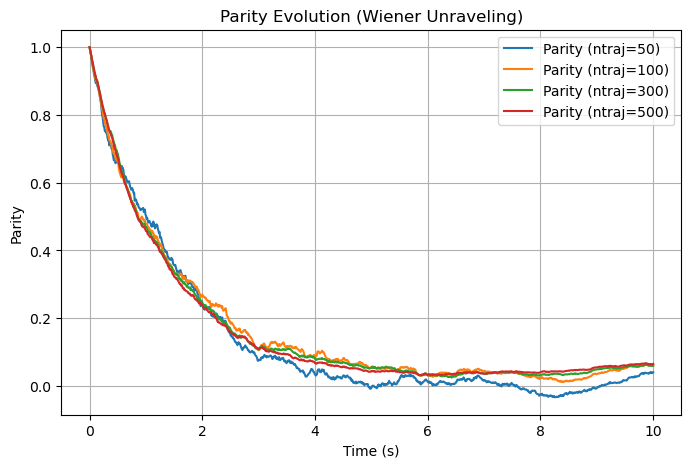

100%|██████████| 4/4 [07:28<00:00, 112.24s/num_traj]


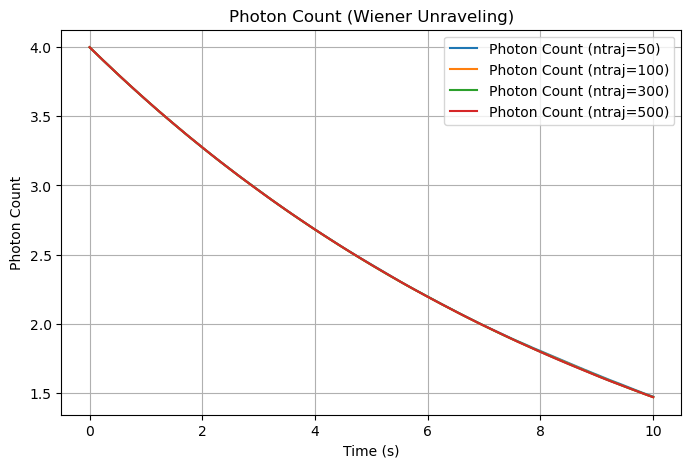

100%|██████████| 4/4 [07:33<00:00, 113.32s/num_traj]


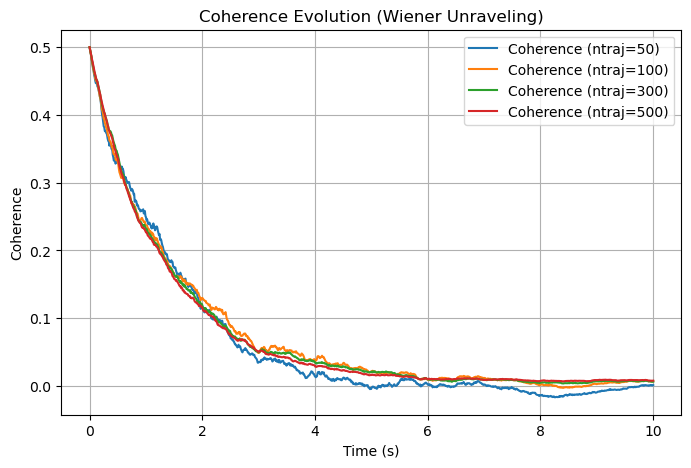

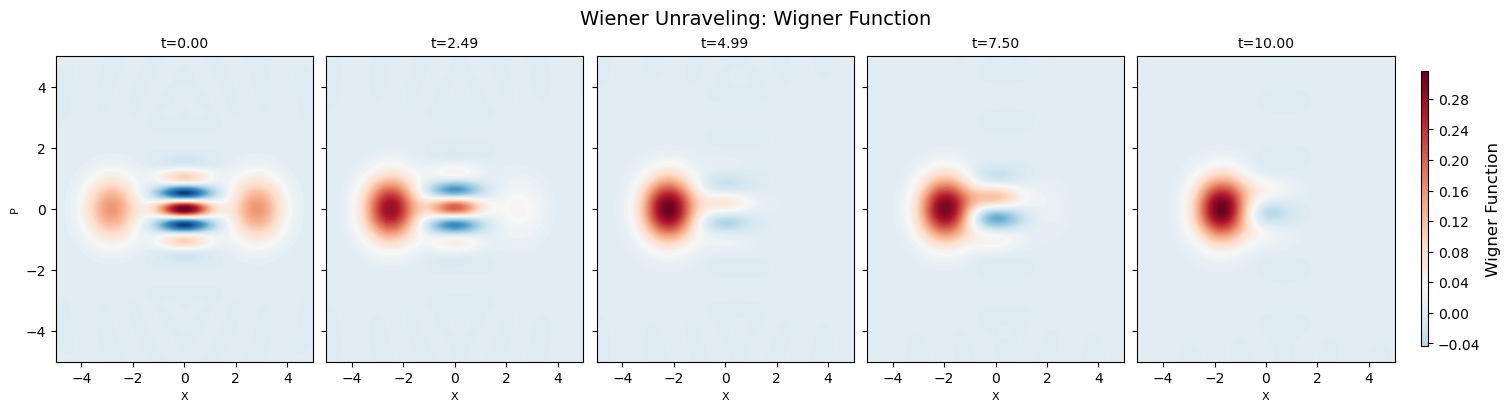

In [ ]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
alpha = 2.0             # Coherent state amplitude
kappa = 0.1             # Photon loss rate
t_max = 10.0             # Maximum simulation time
n_steps = 1000          # Number of time steps
dim = 20                # Hilbert space dimension
dt = t_max / n_steps    # Time step size
tlist = np.linspace(0, t_max, n_steps)

# Initial cat state
coherent_plus = coherent(dim, alpha) + coherent(dim, -alpha)
psi_cat = coherent_plus.unit()

# Operators
a = destroy(dim)
Delta = 0.00  # Detuning (set to zero if not applicable)
H = Delta * a.dag() * a  # Example Hamiltonian
L1 = np.sqrt(kappa / 2) * (a + 1j * alpha)
L2 = 1j * np.sqrt(kappa / 2) * (a - 1j * alpha)
c_ops = [L1, L2]

# Parity operator
parity_op = sum(
    [(-1) ** n * basis(dim, n) * basis(dim, n).dag() for n in range(dim)]
)

# Photon number operator
photon_number_op = a.dag() * a

# Coherence operator (off-diagonal element between |alpha> and |-alpha>)
coherence_op = coherent(dim, alpha) * coherent(dim, -alpha).dag()

# Different ntraj values to compare
ntraj_list = [50, 100, 300, 500]
# ntraj_list = [5, 10, 15]

# Parity Evolution
plt.figure(figsize=(8, 5))

# Run Wiener unraveling simulations and plot parity evolution
for num_trajectories_qsd in tqdm(ntraj_list, unit='num_traj'):
    qsd_trajectory_parity = np.zeros((num_trajectories_qsd, len(tlist)))

    np.random.seed(42)  # For reproducibility
    for traj in tqdm(range(num_trajectories_qsd), unit='traj'):
        state = psi_cat  # Reset state for each trajectory
        trajectory_states = [state]  # Include the initial state

        for t in tlist[:-1]:  # Iterate over all but the last time step
            # Expectation values for the collapse operators
            L1_exp = expect(L1, state)
            L2_exp = expect(L2, state)

            # Wiener increments
            dW1 = np.sqrt(dt) * np.random.randn()
            dW2 = np.sqrt(dt) * np.random.randn()

            # Deterministic evolution term
            deterministic = (
                -1j * H * state * dt
                + (L1_exp.conjugate() * L1 - 0.5 * (L1.dag() * L1 + np.abs(L1_exp)**2)) * state * dt
                + (L2_exp.conjugate() * L2 - 0.5 * (L2.dag() * L2 + np.abs(L2_exp)**2)) * state * dt
            )

            # Stochastic evolution term
            stochastic = (
                (L1 - L1_exp) * state * dW1
                + (L2 - L2_exp) * state * dW2
            )

            # Update state and normalize
            state = (state + deterministic + stochastic).unit()
            trajectory_states.append(state)  # Append the new state

        # Compute parity for this trajectory
        qsd_trajectory_parity[traj] = [
            expect(parity_op, state) for state in trajectory_states
        ]

    # Average over all QSD trajectories
    qsd_parity = np.mean(qsd_trajectory_parity, axis=0)
    plt.plot(tlist, qsd_parity, label=f"Parity (ntraj={num_trajectories_qsd})")

plt.xlabel("Time (s)")
plt.ylabel("Parity")
plt.title("Parity Evolution (Wiener Unraveling)")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(img_path, 'parity_evolution_wiener_multi_math599.pdf'), dpi=300)  # Save as PDF
plt.show()

# Photon Number Evolution
plt.figure(figsize=(8, 5))

# Run Wiener unraveling simulations and plot photon number evolution
for num_trajectories_qsd in tqdm(ntraj_list, unit='num_traj'):
    qsd_trajectory_photon_number = np.zeros((num_trajectories_qsd, len(tlist)))

    np.random.seed(42)  # For reproducibility
    for traj in tqdm(range(num_trajectories_qsd), unit='traj'):
        state = psi_cat  # Reset state for each trajectory
        trajectory_states = [state]  # Include the initial state

        for t in tlist[:-1]:  # Iterate over all but the last time step
            # Expectation values for the collapse operators
            L1_exp = expect(L1, state)
            L2_exp = expect(L2, state)

            # Wiener increments
            dW1 = np.sqrt(dt) * np.random.randn()
            dW2 = np.sqrt(dt) * np.random.randn()

            # Deterministic evolution term
            deterministic = (
                -1j * H * state * dt
                + (L1_exp.conjugate() * L1 - 0.5 * (L1.dag() * L1 + np.abs(L1_exp)**2)) * state * dt
                + (L2_exp.conjugate() * L2 - 0.5 * (L2.dag() * L2 + np.abs(L2_exp)**2)) * state * dt
            )

            # Stochastic evolution term
            stochastic = (
                (L1 - L1_exp) * state * dW1
                + (L2 - L2_exp) * state * dW2
            )

            # Update state and normalize
            state = (state + deterministic + stochastic).unit()
            trajectory_states.append(state)  # Append the new state

        # Compute photon number for this trajectory
        qsd_trajectory_photon_number[traj, :] = [
        expect(photon_number_op, state) for state in trajectory_states
        ]

    # Average over all QSD trajectories
    qsd_photon_number = np.mean(qsd_trajectory_photon_number, axis=0)
    plt.plot(tlist, qsd_photon_number, label=f"Photon Count (ntraj={num_trajectories_qsd})")

plt.xlabel("Time (s)")
plt.ylabel("Photon Count")
plt.title("Photon Count (Wiener Unraveling)")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(img_path, 'photon_count_wiener_multi_math599.pdf'), dpi=300)  # Save as PDF
plt.show()

# Coherence Evolution
plt.figure(figsize=(8, 5))

# Run Wiener unraveling simulations and plot coherence
for num_trajectories_qsd in tqdm(ntraj_list, unit="num_traj"):
    qsd_trajectory_coherence = np.zeros((num_trajectories_qsd, len(tlist)))

    np.random.seed(42)  # For reproducibility
    for traj in tqdm(range(num_trajectories_qsd), unit="traj"):
        state = psi_cat  # Reset state for each trajectory
        trajectory_states = [state]  # Include the initial state

        for t in tlist[:-1]:  # Iterate over all but the last time step
            # Expectation values for the collapse operators
            L1_exp = expect(L1, state)
            L2_exp = expect(L2, state)

            # Wiener increments
            dW1 = np.sqrt(dt) * np.random.randn()
            dW2 = np.sqrt(dt) * np.random.randn()

            # Deterministic evolution term
            deterministic = (
                -1j * H * state * dt
                + (L1_exp.conjugate() * L1 - 0.5 * (L1.dag() * L1 + np.abs(L1_exp)**2)) * state * dt
                + (L2_exp.conjugate() * L2 - 0.5 * (L2.dag() * L2 + np.abs(L2_exp)**2)) * state * dt
            )

            # Stochastic evolution term
            stochastic = (
                (L1 - L1_exp) * state * dW1
                + (L2 - L2_exp) * state * dW2
            )

            # Update state and normalize
            state = (state + deterministic + stochastic).unit()
            trajectory_states.append(state)  # Append the new state

        # Compute coherence for this trajectory
        qsd_trajectory_coherence[traj, :] = [
        np.real(state.overlap(coherence_op)) for state in trajectory_states
        ]

    # Average over all QSD trajectories
    qsd_coherence = np.mean(qsd_trajectory_coherence, axis=0)
    plt.plot(tlist, qsd_coherence, label=f"Coherence (ntraj={num_trajectories_qsd})")

plt.xlabel("Time (s)")
plt.ylabel("Coherence")
plt.title("Coherence Evolution (Wiener Unraveling)")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(img_path, 'coherence_wiener_multi_math599.pdf'), dpi=300)  # Save as PDF
plt.show()

# Function to plot Wigner snapshots
def save_wigner_snapshots(
    states, title, times, n_steps, x_range=5, y_range=5, filename="wigner_snapshots"
):
    x = np.linspace(-x_range, x_range, 200)
    y = np.linspace(-y_range, y_range, 200)
    X, Y = np.meshgrid(x, y)

    # Compute global min and max across all states for consistent color scale
    global_min, global_max = float("inf"), float("-inf")
    for state in states:
        W = wigner(state, x, y)
        global_min = min(global_min, W.min())
        global_max = max(global_max, W.max())

    # Select 5 evenly spaced snapshots
    snapshot_indices = np.linspace(0, len(states) - 1, 5, dtype=int)

    # Create the figure and axes with constrained layout
    fig, axes = plt.subplots(
        1, 5, figsize=(15, 4), sharey=True, constrained_layout=True
    )

    # Plot each snapshot
    for i, idx in enumerate(snapshot_indices):
        state = states[idx]
        W = wigner(state, x, y)
        ax = axes[i]
        im = ax.contourf(
            X, Y, W, 100, cmap="RdBu_r", vmin=global_min, vmax=global_max
        )
        ax.set_title(f"t={times[idx]:.2f}", fontsize=10)
        ax.set_xlabel("X", fontsize=8)
        if i == 0:
            ax.set_ylabel("P", fontsize=8)

    # Add a single color bar for the entire figure
    cbar = fig.colorbar(
        im, ax=axes, location="right", aspect=40, shrink=0.9, pad=0.02
    )
    cbar.set_label("Wigner Function", fontsize=12)

    # Save the figure in tight layout
    fig.suptitle(title, fontsize=14)
    plt.savefig(os.path.join(img_path, f"{filename}.pdf"), format="pdf", bbox_inches="tight", dpi=300)
    plt.show()

# Wigner snapshots
qsd_states = [psi_cat]
state = psi_cat
np.random.seed(42)  # For reproducibility

for t in tlist[:-1]:
    # Expectation values
    L1_exp = expect(L1, state)
    L2_exp = expect(L2, state)

    # Wiener increments
    dW1 = np.sqrt(dt) * np.random.randn()
    dW2 = np.sqrt(dt) * np.random.randn()

    # Deterministic evolution term
    deterministic = (
        -1j * H * state * dt
        + (L1_exp.conjugate() * L1 - 0.5 * (L1.dag() * L1 + np.abs(L1_exp)**2)) * state * dt
        + (L2_exp.conjugate() * L2 - 0.5 * (L2.dag() * L2 + np.abs(L2_exp)**2)) * state * dt
    )

    # Stochastic evolution term
    stochastic = (
        1 / np.sqrt(2) * ((L1 - L1_exp) * state * dW1
        + (L2 - L2_exp) * state * dW2)
    )

    # Update state and normalize
    state = (state + deterministic + stochastic).unit()
    qsd_states.append(state)
    
# Save Poisson unraveling snapshots
save_wigner_snapshots(
    qsd_states,
    "Wiener Unraveling: Wigner Function",
    tlist,
    n_steps,
    filename="wiener_wigner_multi_math599",
)


## Comparison 

In [16]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.0             # Coherent state amplitude
kappa = 0.1             # Photon loss rate
t_max = 10.0             # Maximum simulation time
n_steps = 1000          # Number of time steps
dim = 20                # Hilbert space dimension
dt = t_max / n_steps    # Time step size
tlist = np.linspace(0, t_max, n_steps)
poisson_seed = 42

# Initial cat state
coherent_plus = coherent(dim, alpha) + coherent(dim, -alpha)
psi_cat = coherent_plus.unit()

# Operators
a = destroy(dim)
Delta = 0.00  # Detuning (set to zero if not applicable)
H = Delta * a.dag() * a  # Example Hamiltonian
L1 = np.sqrt(kappa / 2) * (a + 1j * alpha)
L2 = 1j * np.sqrt(kappa / 2) * (a - 1j * alpha)
c_ops = [L1, L2]

# Parity operator
parity_op = sum(
    [(-1) ** n * basis(dim, n) * basis(dim, n).dag() for n in range(dim)]
)

# Photon number operator
photon_number_op = a.dag() * a

# Coherence operator (off-diagonal element between |alpha> and |-alpha>)
coherence_op = coherent(dim, alpha) * coherent(dim, -alpha).dag()

# Different ntraj values to compare
ntraj_list_comp = 500

# ------------------------------
# Poisson Unraveling (mcsolve)
# ------------------------------
poisson_result_comp = mcsolve(
    H,  # Corrected Hamiltonian
    psi_cat,
    tlist,
    c_ops=c_ops,
    ntraj=ntraj_list_comp,
    seeds=poisson_seed
)

poisson_parity_comp = expect(parity_op, poisson_result_comp.states)
poisson_photon_number_comp = expect(photon_number_op, poisson_result_comp.states)
poisson_coherence_comp = [
    np.real(state.overlap(coherence_op)) for state in poisson_result_comp.states
]

# ------------------------------
# Quantum State Diffusion (QSD)
# ------------------------------
qsd_trajectory_parity_comp = np.zeros((ntraj_list_comp, len(tlist)))
qsd_trajectory_photon_number_comp = np.zeros((ntraj_list_comp, len(tlist)))
qsd_trajectory_coherence_comp = np.zeros((ntraj_list_comp, len(tlist)))

np.random.seed(42)  # For reproducibility
for traj in tqdm(range(ntraj_list_comp), unit='traj'):
    state = psi_cat  # Reset state for each trajectory
    trajectory_states_comp = [state]  # Include the initial state

    for t in tlist[:-1]:  # Iterate over all but the last time step
        # Expectation values for the collapse operators
        L1_exp = expect(L1, state)
        L2_exp = expect(L2, state)

        # Wiener increments
        dW1 = np.sqrt(dt) * np.random.randn()
        dW2 = np.sqrt(dt) * np.random.randn()

        # Deterministic evolution term
        deterministic = (
            -1j * H * state * dt
            + (L1_exp.conjugate() * L1 - 0.5 * (L1.dag() * L1 + np.abs(L1_exp)**2)) * state * dt
            + (L2_exp.conjugate() * L2 - 0.5 * (L2.dag() * L2 + np.abs(L2_exp)**2)) * state * dt
        )

        # Stochastic evolution term
        stochastic = (
            (L1 - L1_exp) * state * dW1
            + (L2 - L2_exp) * state * dW2
        )

        # Update state and normalize
        state = (state + deterministic + stochastic).unit()
        trajectory_states_comp.append(state)  # Append the new state

    # Compute parity for this trajectory
    qsd_trajectory_parity_comp[traj] = [
        expect(parity_op, state) for state in trajectory_states_comp
    ]
    qsd_trajectory_photon_number_comp[traj, :] = [
        expect(photon_number_op, state) for state in trajectory_states_comp
    ]
    qsd_trajectory_coherence_comp[traj, :] = [
        np.real(state.overlap(coherence_op)) for state in trajectory_states_comp
    ]

# Average over all QSD trajectories
qsd_parity_comp = np.mean(qsd_trajectory_parity_comp, axis=0)
qsd_photon_number_comp = np.mean(qsd_trajectory_photon_number_comp, axis=0)
qsd_coherence_comp = np.mean(qsd_trajectory_coherence_comp, axis=0)

# ------------------------------
# Lindblad Master Equation (mesolve)
# ------------------------------
lindblad_result_comp = mesolve(
    H,  # Corrected Hamiltonian
    psi_cat,
    tlist,
    c_ops=c_ops,
)

lindblad_parity_comp = [
    expect(parity_op, rho) for rho in lindblad_result_comp.states
    ]
lindblad_photon_number_comp = [
    expect(photon_number_op, rho) for rho in lindblad_result_comp.states
]
lindblad_coherence_comp = [
    np.real(rho.overlap(coherence_op)) for rho in lindblad_result_comp.states
]




10.0%. Run time:   7.58s. Est. time left: 00:00:01:08
20.0%. Run time:  15.39s. Est. time left: 00:00:01:01
30.0%. Run time:  23.00s. Est. time left: 00:00:00:53
40.0%. Run time:  30.51s. Est. time left: 00:00:00:45
50.0%. Run time:  38.12s. Est. time left: 00:00:00:38
60.0%. Run time:  45.41s. Est. time left: 00:00:00:30
70.0%. Run time:  52.80s. Est. time left: 00:00:00:22
80.0%. Run time:  60.43s. Est. time left: 00:00:00:15
90.0%. Run time:  67.69s. Est. time left: 00:00:00:07
100.0%. Run time:  74.99s. Est. time left: 00:00:00:00
Total run time:  75.19s


100%|██████████| 500/500 [04:18<00:00,  1.93traj/s]


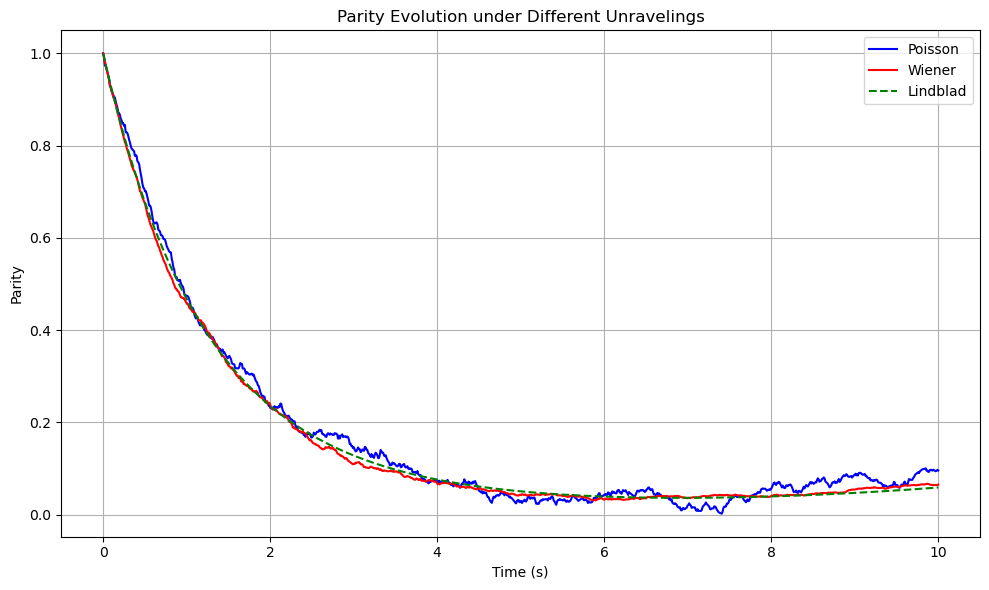

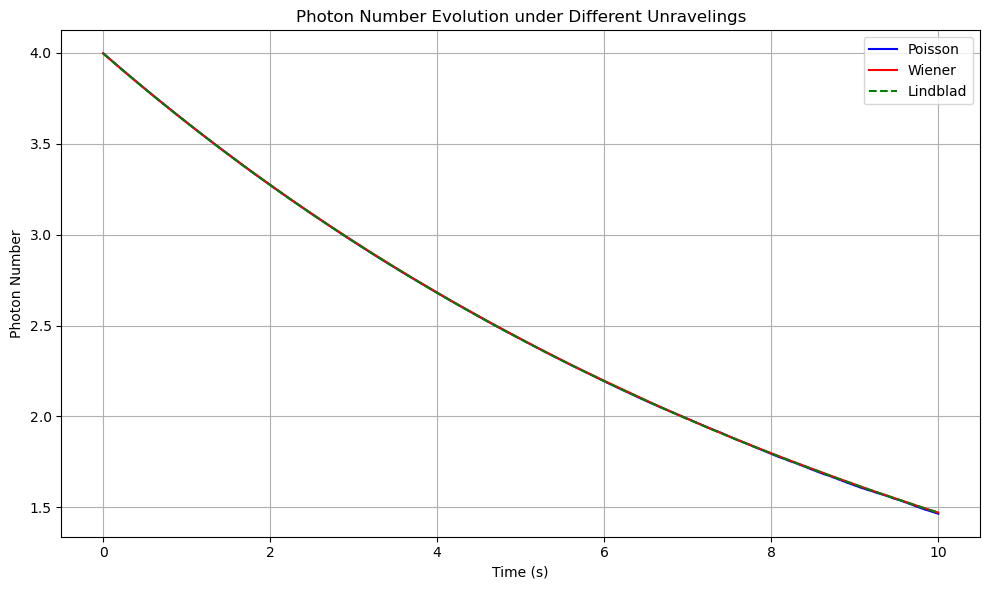

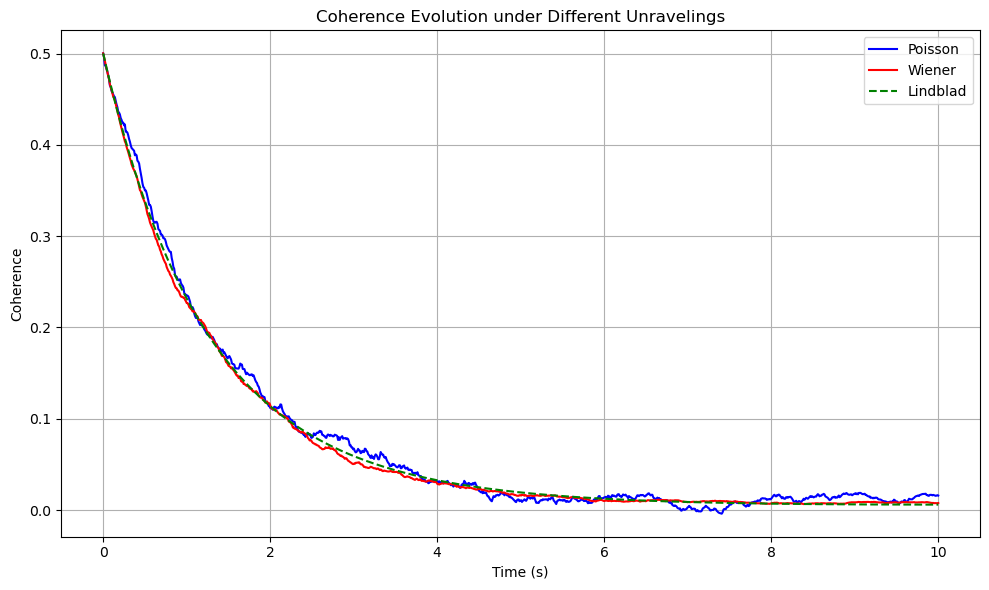

In [ ]:
# ------------------------------
# Plot Results
# ------------------------------

# Plot Parity
plt.figure(figsize=(10, 6))
plt.plot(tlist, poisson_parity_comp, label="Poisson", color='blue')
plt.plot(tlist, qsd_parity_comp, label="Wiener", color='red')
plt.plot(tlist, lindblad_parity_comp, label="Lindblad", linestyle="--", color='green')
plt.title("Parity Evolution under Different Unravelings")
plt.xlabel("Time (s)")
plt.ylabel("Parity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(img_path, 'parity_evolution_all.pdf'))  # Save as PDF
plt.show()

# Plot Photon Number
plt.figure(figsize=(10, 6))
plt.plot(tlist, poisson_photon_number_comp, label="Poisson", color='blue')
plt.plot(tlist, qsd_photon_number_comp, label="Wiener", color='red')
plt.plot(tlist, lindblad_photon_number_comp, label="Lindblad", linestyle="--", color='green')
plt.title("Photon Number Evolution under Different Unravelings")
plt.xlabel("Time (s)")
plt.ylabel("Photon Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(img_path, 'photon_number_all.pdf'))  # Save as PDF
plt.show()

# Plot Coherence
plt.figure(figsize=(10, 6))
plt.plot(tlist, poisson_coherence_comp, label="Poisson", color='blue')
plt.plot(tlist, qsd_coherence_comp, label="Wiener", color='red')
plt.plot(tlist, lindblad_coherence_comp, label="Lindblad", linestyle="--", color='green')
plt.title("Coherence Evolution under Different Unravelings")
plt.xlabel("Time (s)")
plt.ylabel("Coherence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(img_path, 'coherence_evolution_all.pdf'))  # Save as PDF
plt.show()

In [9]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
